##### Notino Test Assigment
###### Author: Klara Martinaskova
###### Task: Evaluate an AB test of the recommendation algorithm


In [218]:
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
import zipfile
import os
import csv
import scipy.stats as stats


In [219]:
# open CSV files
with open('clients_final.csv', 'r') as file:
    csv_clients = csv.reader(file)
with open('orders_final.csv', 'r') as file:
    csv_orders = csv.reader(file)

In [220]:

print(type(csv_clients))
print(type(csv_orders))

<class '_csv.reader'>
<class '_csv.reader'>


In [221]:
# open csv file ans save as dataframe
df_clients = pd.read_csv('clients_final.csv')
df_orders = pd.read_csv('orders_final.csv')

print(type(df_clients))
print(type(df_orders))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [222]:
print(df_clients.head())

         date country               sessionID            clientID  isNew  \
0  2023-05-17      CH  4917af16af33f.smyluydm  47f9978883.4917aff      0   
1  2023-05-17      CH  4917af16aff17.xgrloruz   913x1x688.497f486      0   
2  2023-05-17      CH   4917af166a373.j1v9mmi  491a661ax6.4917aff      1   
3  2023-05-17      CH   4917af1669x74.vsakfcn  4ff8714149.4917af9      1   
4  2023-05-17      CH   4917af1661f1a.fxp7nsf  67a67x3f9.4917af18      1   

   abUser  orderNumber  
0     1.0          NaN  
1     1.0          NaN  
2     1.0          NaN  
3     1.0          NaN  
4     1.0          NaN  


In [223]:
df_clients = pd.read_csv('clients_final.csv',encoding="cp1250", sep=",", low_memory=False)

In [224]:
print(df_clients.head())

         date country               sessionID            clientID  isNew  \
0  2023-05-17      CH  4917af16af33f.smyluydm  47f9978883.4917aff      0   
1  2023-05-17      CH  4917af16aff17.xgrloruz   913x1x688.497f486      0   
2  2023-05-17      CH   4917af166a373.j1v9mmi  491a661ax6.4917aff      1   
3  2023-05-17      CH   4917af1669x74.vsakfcn  4ff8714149.4917af9      1   
4  2023-05-17      CH   4917af1661f1a.fxp7nsf  67a67x3f9.4917af18      1   

   abUser  orderNumber  
0     1.0          NaN  
1     1.0          NaN  
2     1.0          NaN  
3     1.0          NaN  
4     1.0          NaN  


In [225]:
abUser1 = df_clients[df_clients['abUser']==1.0]
print(abUser1.shape)
print(abUser1['abUser'].count())
print((df_clients['abUser']==1.0))

(2769600, 7)
2769600
0           True
1           True
2           True
3           True
4           True
           ...  
5562167     True
5562168    False
5562169    False
5562170    False
5562171     True
Name: abUser, Length: 5562172, dtype: bool


In [226]:
sum_reco = (df_clients['abUser']==1.0).sum()
sum_control = (df_clients['abUser']==2.0).sum()
sum_99 = (df_clients['abUser']).isna().sum()
# print only unique values in abUser
print(df_clients['abUser'].unique())
print(sum_reco)
print(sum_control)
print(sum_99)
print(sum_reco + sum_control + sum_99)
print(df_clients.shape)

[ 1.  2. nan]
2769600
2770134
22438
5562172
(5562172, 7)


In [227]:
abUser_unique = df_clients['abUser'].unique() # 99 is not present here (just NaN)
txt = "Unique values in abUser: {}"
print(txt.format(abUser_unique))

Unique values in abUser: [ 1.  2. nan]


In [228]:
# o	Is the ratio of users in the reco group and users in the test group really 50:50? 
# reco group: abUser   = 2
# control group: abUser = 1

reco_count = df_clients['abUser'][df_clients['abUser']==1].count()
control_count = df_clients['abUser'][df_clients['abUser']==2].count()
other_count = (df_clients['abUser']).isna().sum()

print(reco_count)
print(control_count)
print(other_count)
print(reco_count + control_count + other_count) # check sum of all
print(df_clients.shape)





2769600
2770134
22438
5562172
(5562172, 7)


In [229]:
# •	What about the users with an unassigned group? Bambino thinks the test is fine if their share is below 0.5%. 
reco_count = df_clients['abUser'][df_clients['abUser']==1].count()
control_count = df_clients['abUser'][df_clients['abUser']==2].count()
other_count = (df_clients['abUser']).isna().sum()

percent = other_count/((reco_count + control_count + other_count))*100


if percent < 0.5:
    print("The test is fine, share is below 0.5%.")
    print("Percent of users with an unassigned group: {:.2f}%".format(percent))
else:
    print("The test is not fine, share is {:.2f}%".format(percent))


The test is fine, share is below 0.5%.
Percent of users with an unassigned group: 0.40%


In [230]:
# group by date
groupt_date = df_clients.groupby('date')
print(groupt_date.head())

               date country               sessionID            clientID  \
0        2023-05-17      CH  4917af16af33f.smyluydm  47f9978883.4917aff   
1        2023-05-17      CH  4917af16aff17.xgrloruz   913x1x688.497f486   
2        2023-05-17      CH   4917af166a373.j1v9mmi  491a661ax6.4917aff   
3        2023-05-17      CH   4917af1669x74.vsakfcn  4ff8714149.4917af9   
4        2023-05-17      CH   4917af1661f1a.fxp7nsf  67a67x3f9.4917af18   
...             ...     ...                     ...                 ...   
4850093  2023-06-14      CH  49199f9a17a17.snx39iox   69a1a9348.49199f9   
4850094  2023-06-14      CH  49199f9a19441.mx3mzhbg  4188a94139.49199fx   
4850095  2023-06-14      CH  49199f96a94xx.1yp1ge6r   a3974a4979.49xf99   
4850096  2023-06-14      CH  49199f96x9371.nrd9r8tv  4319f86691.49198x1   
4850097  2023-06-14      CH   49199f96f1ff9.vkrwehp   x46134166.49199f9   

         isNew  abUser  orderNumber  
0            0     1.0          NaN  
1            0     1.0 

In [231]:
# how many order num is Nan
print(df_clients['orderNumber'].isna().sum())

5289905


In [232]:
# o	Can you test it by an appropriate statistical test? 
# o	Do you prefer to test it on a daily basis, or to run one test for the whole period? 
# o	If you run multiple tests, do you need all of them to have positive results to verify the 50:50 distribution hypothesis? 


In [233]:
print(df_clients.duplicated())

0          False
1          False
2          False
3          False
4          False
           ...  
5562167    False
5562168    False
5562169    False
5562170    False
5562171    False
Length: 5562172, dtype: bool


In [234]:
# new_df = df.dropna() # new dataframe, which doesnot change the original dataframe and does not contain NaN values
# df['Date'] = pd.to_datetime(df['Date']) # convert column Date to datetime
# print(df.duplicated())
# df.drop_duplicates(inplace = True)


In [235]:
# •	What about the orders that are not in GA data? What is their share? How do you propose to handle them?
df_join = df_clients.merge(df_orders, on='orderNumber', how='inner') # inner join
df_join_count = df_join['orderNumber'].count() # number of common orders in both dataframes
df_clients_count = df_clients['orderNumber'].count() # number of orders in df_clients
share = 1-(df_join_count/df_clients_count) # share of orders that are not in GA data

print("Share of orders that are not in GA data: {:.2f}%".format(share*100))

Share of orders that are not in GA data: 8.76%


In [236]:
print(df_join.head())

       date_x country_x               sessionID            clientID  isNew  \
0  2023-05-17        CH   4917af16fx34x.n6c6bdy  4f17a76x4f.4917af9      0   
1  2023-05-17        CH   4917af184a73x.esah47g   74x747x34.49364ax      0   
2  2023-05-17        CH  4917af1887a37.axhmhla9   7xfx73f47.49xf9a1      0   
3  2023-05-17        CH  491764771a143.uf1pn9mb  478786336a.48f641a      0   
4  2023-05-17        CH  4917af6afxxfa.3zn8xizx   7499371f7.4917aa1      0   

   abUser   orderNumber country_y      date_y  quantity   revenue  
0     2.0  1.142808e+09        CH  2023-05-17         1    8.3551  
1     1.0  1.142808e+09        CH  2023-05-17         9  107.4632  
2     1.0  1.142808e+09        CH  2023-05-17         3   14.1620  
3     1.0  1.142810e+09        CH  2023-05-17        26  140.9439  
4     1.0  1.142808e+09        CH  2023-05-17         2   16.4306  


### Analysis of revenue and quantity

#### Firt check of the data

In [237]:
#•	Does the “reco group” earn, on average, a greater revenue? Does it have larger orders? 
# Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?

# reco group =  abUser == 1
# control group = abUser == 2

reco_revenue_mean = df_join['revenue'][df_join['abUser']==1].mean() 
control_revenue_mean = df_join['revenue'][df_join['abUser']==2].mean()

print(reco_revenue_mean)
print(control_revenue_mean)

if reco_revenue_mean > control_revenue_mean:
    print("The reco group earns, on average, a greater revenue.")
else:
    print("The reco group does not earn, on average, a greater revenue.")

print("The average revenue of reco group is {:.2f} and the average revenue of control group is {:.2f}".format(reco_revenue_mean, control_revenue_mean))



66.9124707396017
41.82435776019209
The reco group earns, on average, a greater revenue.
The average revenue of reco group is 66.91 and the average revenue of control group is 41.82


In [238]:
# Does it have larger orders? 
# Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?


In [239]:
reco_quantity_mean = df_join['quantity'][df_join['abUser']==1].mean() 
ceontrol_quantity_mean = df_join['quantity'][df_join['abUser']==2].mean()

print(reco_quantity_mean)
print(ceontrol_quantity_mean)

# almost same, need visualization of distribution

#df_join.loc[df_join[df_join['abUser']==1].quantity]


4.358408478354907
4.350676699239234


#### Plot of distribution of date for quantity and revenue

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


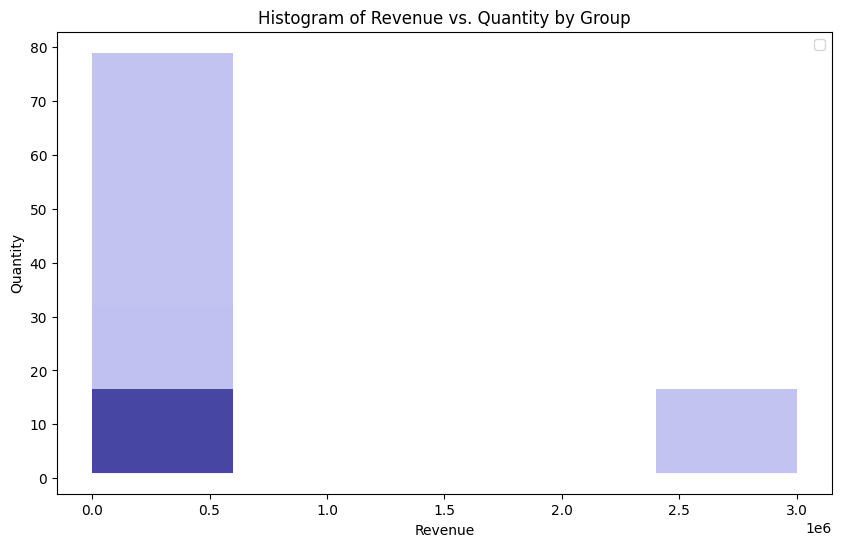

In [240]:
# Filter the DataFrame for group == 1 and group == 2
group_1_data = df_join[df_join['abUser'] == 1]
group_2_data = df_join[df_join['abUser'] == 2]

# Create histograms for each group using Seaborn
plt.figure(figsize=(10, 6))  # Set the figure size
sns.histplot(data=group_1_data, x='revenue', y='quantity', bins=5, color='blue', label='Group 1')
sns.histplot(data=group_2_data, x='revenue', y='quantity', bins=5, color='red', label='Group 2')

# Customize the plot
plt.xlabel('Revenue')
plt.ylabel('Quantity')
plt.title('Histogram of Revenue vs. Quantity by Group')
plt.legend(loc='upper right')

# Show the plot
plt.show()






<AxesSubplot:ylabel='Frequency'>

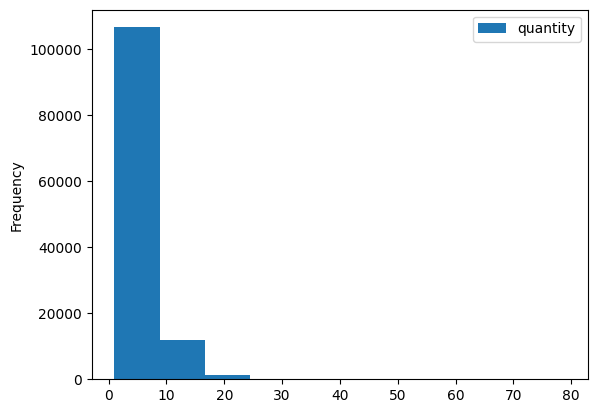

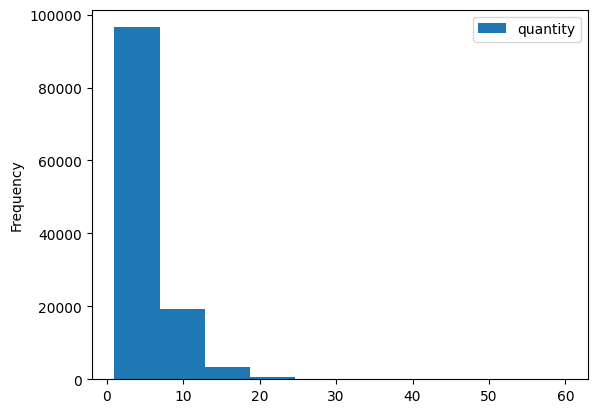

In [241]:
#df.plot(x='game', y=['points_for', 'points_against'])
df_join_reco = df_join[df_join['abUser']==1]
df_join_control = df_join[df_join['abUser']==2]

df_join_reco.plot(x='revenue', y=['quantity'],kind  = "hist")
df_join_control.plot(x='revenue', y=['quantity'], kind = "hist")


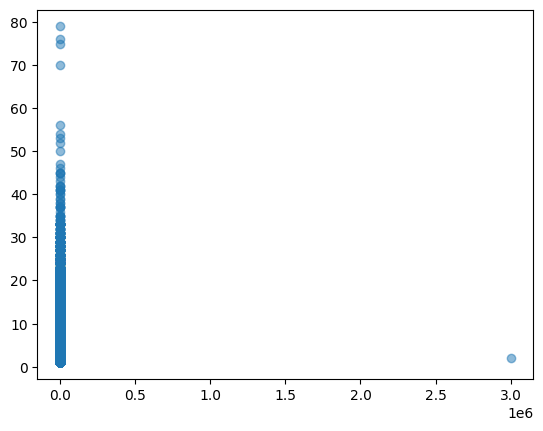

In [242]:
group_1_data = df_join[df_join['abUser'] == 1]

# Create a scatter plot with 'revenue' on the x-axis and 'quantity' on the y-axis
plt.scatter(group_1_data['revenue'], group_1_data['quantity'], alpha=0.5)

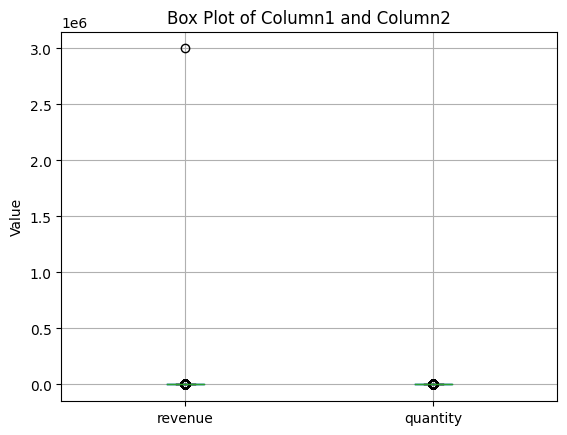

In [243]:
df_join.boxplot(column=["revenue", "quantity"])
plt.ylabel("Value")
plt.title("Box Plot of Column1 and Column2")
plt.show()

(array([2.5049e+04, 3.1337e+04, 2.0186e+04, 1.5132e+04, 9.8250e+03,
        6.2400e+03, 3.8660e+03, 2.4700e+03, 1.6030e+03, 1.1480e+03,
        7.7700e+02, 5.7600e+02, 4.2000e+02, 2.9900e+02, 2.1900e+02,
        1.8800e+02, 1.2700e+02, 1.1400e+02, 8.6000e+01, 7.1000e+01,
        4.9000e+01, 3.7000e+01, 3.7000e+01, 4.0000e+01, 3.0000e+01,
        3.1000e+01, 1.8000e+01, 1.6000e+01, 1.2000e+01, 1.0000e+01,
        1.0000e+01, 1.5000e+01, 7.0000e+00, 1.5000e+01, 6.0000e+00,
        5.0000e+00, 9.0000e+00, 1.3000e+01, 6.0000e+00, 6.0000e+00,
        4.0000e+00, 4.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00,
        1.0000e+00, 2.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00, 3.0000e+00, 2.0000e+00, 0.0000e+00, 1.0000e+00,
        3.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.00

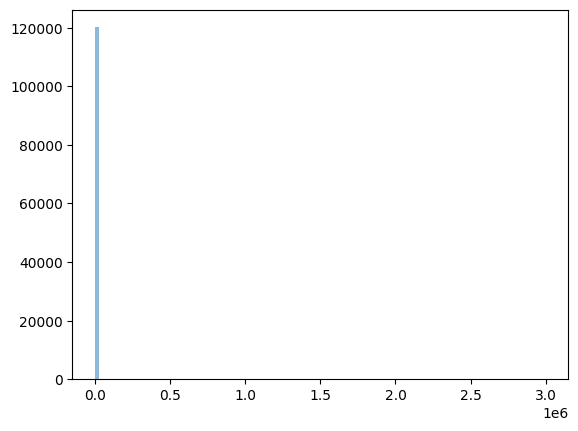

In [244]:
plt.hist(x = df_join['revenue'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['revenue'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')

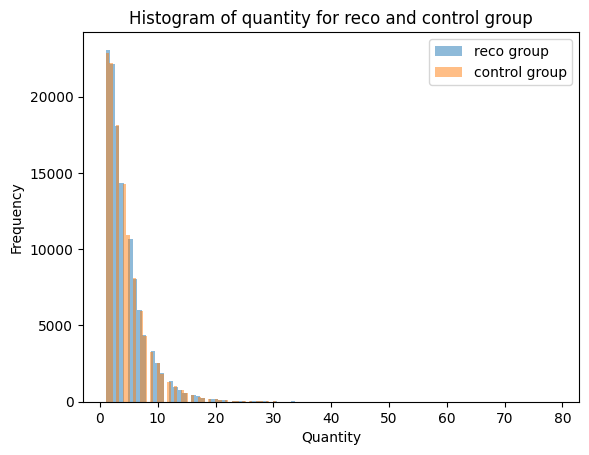

In [245]:
plt.hist(x = df_join['quantity'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['quantity'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend(['reco group', 'control group'])
plt.title('Histogram of quantity for reco and control group')
plt.show()

In [246]:
groubydfjoin = df_join.groupby(["revenue"]).count()

print(len(df_join))
print(len(groubydfjoin))
print(df_join.groupby(["revenue"]).count())


248419
117191
               date_x  country_x  sessionID  clientID  isNew  abUser  \
revenue                                                                
-4.230000e-02       1          1          1         1      1       1   
-2.110000e-02       1          1          1         1      1       1   
-1.000000e-02       1          1          1         1      1       1   
-4.700000e-03       1          1          1         1      1       1   
-4.600000e-03       1          1          1         1      1       1   
...               ...        ...        ...       ...    ...     ...   
 1.251575e+03       1          1          1         1      1       0   
 1.398773e+03       1          1          1         1      1       1   
 1.406341e+03       1          1          1         1      1       1   
 1.527955e+03       1          1          1         1      1       1   
 3.000000e+06       1          1          1         1      1       1   

               orderNumber  country_y  date_y  qu

In [247]:
reco_quantity_mean = df_join['revenue'][df_join['abUser']==1].max() 
ceontrol_quantity_mean = df_join['revenue'][df_join['abUser']==2].max()

print(reco_quantity_mean)
print(ceontrol_quantity_mean)

reco_max = df_join['revenue'][df_join['abUser']==1].idxmax()
control_max = df_join['revenue'][df_join['abUser']==2].idxmax()

print(reco_max)
print(control_max)

print(df_join.iloc[reco_max])


3000000.0
1398.772999
121663
110934
date_x                     2023-06-01
country_x                          NE
sessionID      4918949f91x78.enlkzogr
clientID            4f739637f.4918949
isNew                               1
abUser                            1.0
orderNumber               247862180.0
country_y                          NE
date_y                     2023-06-01
quantity                            2
revenue                     3000000.0
Name: 121663, dtype: object


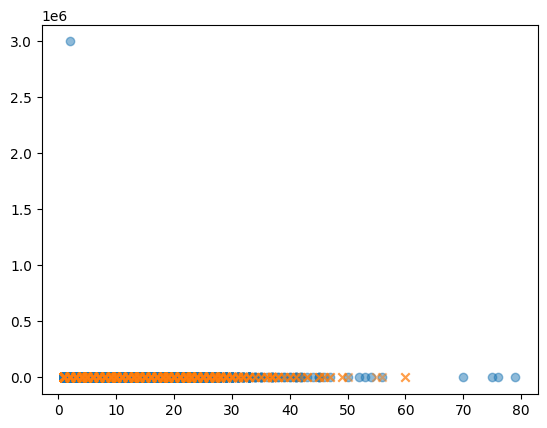

In [248]:
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker = "x")

In [249]:
print(df_join.loc[reco_max])
df_join_without_outliers = df_join.drop(reco_max)

date_x                     2023-06-01
country_x                          NE
sessionID      4918949f91x78.enlkzogr
clientID            4f739637f.4918949
isNew                               1
abUser                            1.0
orderNumber               247862180.0
country_y                          NE
date_y                     2023-06-01
quantity                            2
revenue                     3000000.0
Name: 121663, dtype: object


In [250]:
reco_quantity_mean = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1].mean() 
ceontrol_quantity_mean = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2].mean()

print(reco_quantity_mean)
print(ceontrol_quantity_mean)

4.358428097262314
4.350676699239234


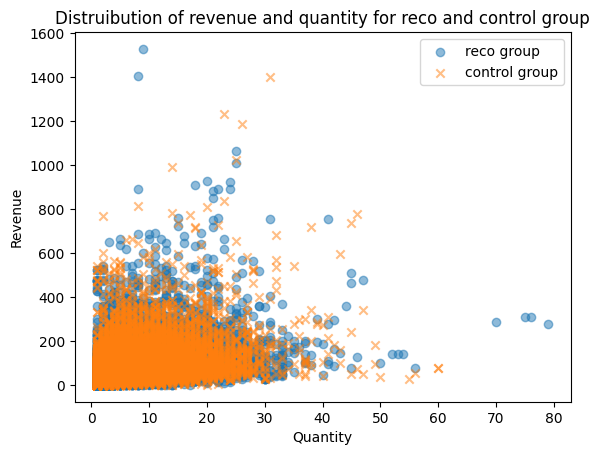

In [251]:
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group')
plt.show()

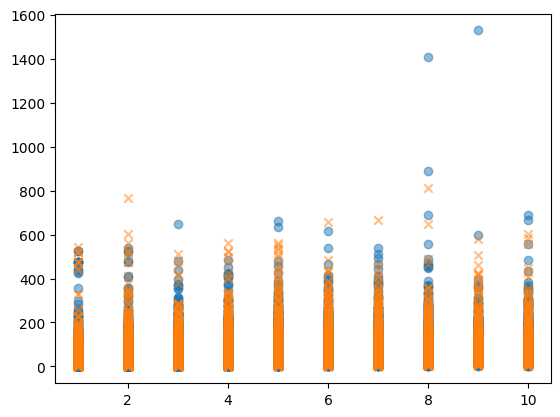

In [252]:
filtered_df = df_join_without_outliers[(df_join_without_outliers['quantity'] >= 1) & (df_join_without_outliers['quantity'] <= 10)]
plt.scatter(filtered_df['quantity'][filtered_df['abUser'] == 1], 
            filtered_df['revenue'][filtered_df['abUser'] == 1], 
            alpha=0.5, marker='o', label='abUser 1')

plt.scatter(filtered_df['quantity'][filtered_df['abUser'] == 2], 
            filtered_df['revenue'][filtered_df['abUser'] == 2], 
            alpha=0.5, marker='x', label='abUser 2')

abUser           1.0         2.0
quantity                        
1          15.066200   15.320000
2          20.847600   20.907750
3          26.289300   26.288800
4          31.026800   30.457050
5          35.468600   35.814550
6          40.596100   39.922700
7          44.806850   44.190900
8          50.081600   48.750000
9          53.516698   53.704200
10         56.436850   54.169600
11         60.987700   61.665700
12         64.778700   62.431450
13         68.249850   71.489900
14         69.078399   71.160000
15         80.717050   78.992100
16         75.833700   79.569050
17         79.468800   80.755598
18         87.958600   84.529498
19         90.800150   98.340000
20         86.981000   95.360000
21         95.280300  105.720700
22        114.706250   97.471197
23        110.047800   93.973600
24         91.202150  108.428247
25        100.751850  108.919350
26        111.756100  123.985699
27        110.554449  138.237200
28         95.020099  152.094799
29        

<Figure size 3000x1000 with 0 Axes>

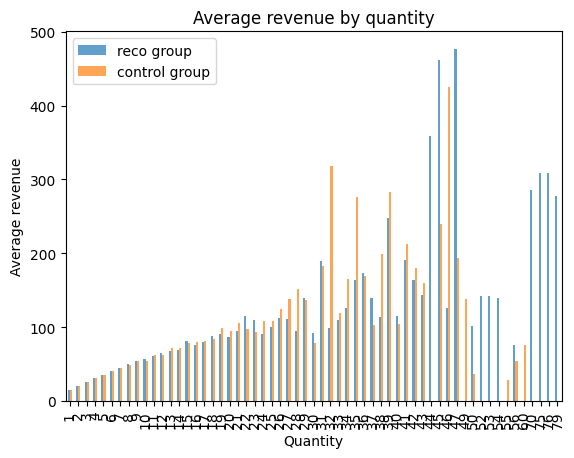

In [253]:

grouped_data = df_join_without_outliers.groupby(['quantity', 'abUser'])['revenue'].median().unstack()
print(grouped_data)

# Create a bar plot
plt.figure(figsize=(30, 10))
ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(['reco group', 'control group'])
plt.show()


<Figure size 1000x600 with 0 Axes>

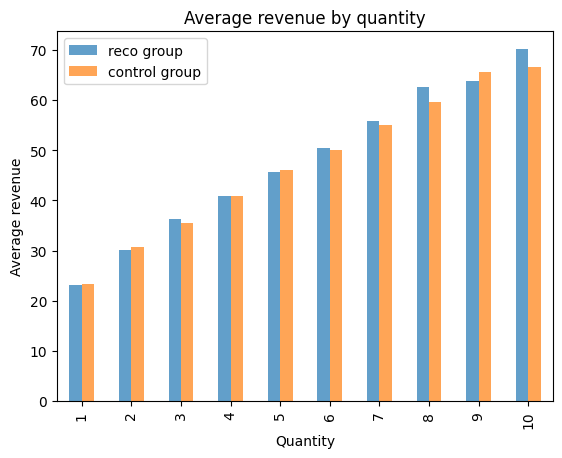

In [254]:
filtered_df = df_join_without_outliers[df_join_without_outliers['quantity'].between(1, 10)]


grouped_data = filtered_df.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(['reco group', 'control group'])

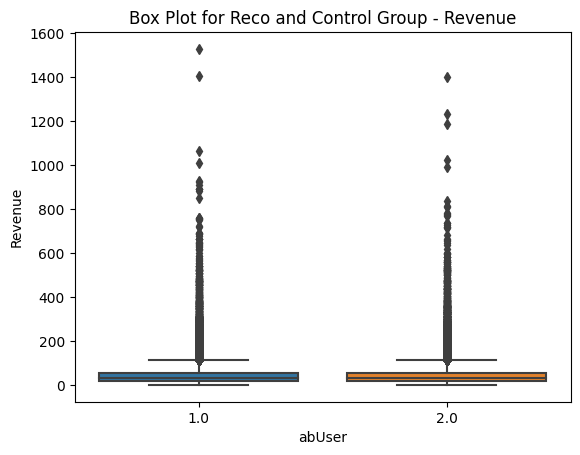

In [255]:
sns.boxplot(data=df_join_without_outliers, x='abUser', y='revenue')
plt.ylabel("Revenue")
plt.title("Box Plot for Reco and Control Group - Revenue")
plt.show()

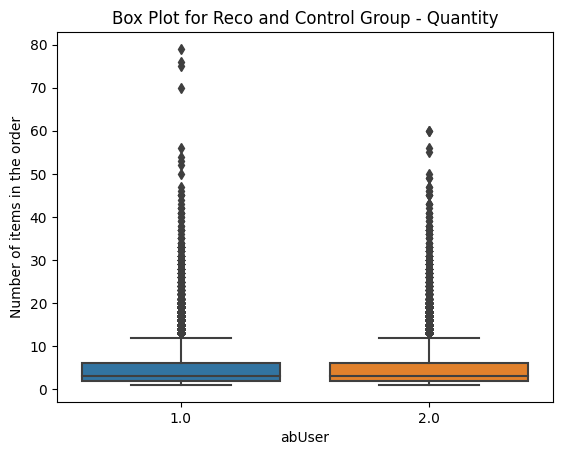

In [256]:
sns.boxplot(data=df_join_without_outliers, x='abUser', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Box Plot for Reco and Control Group - Quantity")
plt.show()

In [257]:
# visualization for 1-10 orders and their revenue


#### T-test  - first try

In [259]:
import pingouin as pg

In [260]:
# statitic T-test
# https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/
data_group1 = df_join['revenue'][df_join['abUser']==1]
data_group2 = df_join['revenue'][df_join['abUser']==2]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=1.0049946203368079, pvalue=0.314900452041927)

In [261]:
result = pg.ttest(data_group1,
                  data_group2,
                  correction=True)
print(result)

               T            dof alternative     p-val           CI95%  \
T-test  1.005287  120216.726116   two-sided  0.314761  [-23.83, 74.0]   

        cohen-d   BF10     power  
T-test   0.0041  0.008  0.171309  


In [262]:
data_group1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1]
data_group2 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

# Here, since the p-value is greater than alpha = 0.05 so we cannot reject the null hypothesis of the test. 

Ttest_indResult(statistic=0.7665789201028287, pvalue=0.4433326655645149)

In [263]:
# statitic T-test
# https://www.geeksforgeeks.org/how-to-conduct-a-two-sample-t-test-in-python/

data_group1 = df_join['quantity'][df_join['abUser']==1]
data_group2 = df_join['quantity'][df_join['abUser']==2]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)


Ttest_indResult(statistic=0.5134949562652239, pvalue=0.6076056100373434)

In [264]:
data_group1 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1]
data_group2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2]

stats.ttest_ind(a=data_group1, b=data_group2, equal_var=True)

Ttest_indResult(statistic=0.5147962137187035, pvalue=0.606695904845074)

In [265]:
result = pg.ttest(data_group1,
                  data_group2,
                  correction=True)
print(result)

               T           dof alternative     p-val          CI95%  cohen-d  \
T-test  0.514797  240336.31949   two-sided  0.606695  [-0.02, 0.04]   0.0021   

         BF10     power  
T-test  0.005  0.080871  


In [266]:
# Test normality
# shapiro-wilk test
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
test_normality_reco_quantity = stats.shapiro(data_reco_without_outliers2)
test_normality_control_quantity = stats.shapiro(data_control_without_outliers2)

print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print(test_normality_reco_quantity)
print(test_normality_control_quantity)

ShapiroResult(statistic=0.6852401494979858, pvalue=0.0)
ShapiroResult(statistic=0.6901998519897461, pvalue=0.0)
ShapiroResult(statistic=0.7836081385612488, pvalue=0.0)
ShapiroResult(statistic=0.78792405128479, pvalue=0.0)


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [267]:
# test homogenity
test_homogenity_revenue = stats.f(data_reco_without_outliers1,data_control_without_outliers1)
test_homogenity_quantity = stats.f(data_reco_without_outliers2,data_control_without_outliers2)


print(test_homogenity_revenue)
print(test_homogenity_quantity)




In [268]:
# test homogenity  leven
res = stats.levene(data_reco_without_outliers1,data_control_without_outliers1, center='trimmed')
print (res.pvalue)

res2 = stats.levene(data_reco_without_outliers2,data_control_without_outliers2, center='trimmed')
print(res2.pvalue)


0.0030542873189224515
0.1087127419323131


In [269]:
# from https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/
# homogeneity test

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value
  
# perform F-test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
control_ftest = f_test(data_reco_without_outliers2,data_control_without_outliers2)
print(reco_ftest)
print(control_ftest)


(1.0162450235366582, 0.002610058156717665)
(1.0169213893294182, 0.0018161378285098673)


#### T-test

In [270]:
# T-test for independent samples unpair
# For data without outliers

# from https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

In [271]:


### For revenue
print("T-test for revenue without outliners: ")
print("")

data_reco_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1]
data_control_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print("")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest)
print("")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats)
print("")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")



T-test for revenue without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.6852401494979858, pvalue=0.0)
ShapiroResult(statistic=0.6901998519897461, pvalue=0.0)

F-test - Homogeneity test: 
(1.0162450235366582, 0.002610058156717665)

Ttest_indResult(statistic=0.7665789201028287, pvalue=0.4433326655645149)

               T            dof alternative     p-val          CI95%  \
T-test  0.766581  240337.542487   two-sided  0.443332  [-0.21, 0.47]   

         cohen-d   BF10     power  
T-test  0.003127  0.006  0.119559  
---------------------------------


In [272]:
### For quantity
print("T-test for quantity without outliners: ")
print("")
data_reco_without_outliers2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1]
data_control_without_outliers2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2]

# Shapiro-wilk test - Normality test:
test_normality_reco_quantity = stats.shapiro(data_reco_without_outliers2)
test_normality_control_quantity = stats.shapiro(data_control_without_outliers2)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_quantity)
print(test_normality_control_quantity)
print("")

# perdom F test - Homogeneity test
control_ftest = f_test(data_reco_without_outliers2,data_control_without_outliers2)
print("F-test - Homogeneity test: ")
print(control_ftest)
print("")

# Two ways to calculate t-test
result_stats2 = stats.ttest_ind(a=data_reco_without_outliers2, b=data_control_without_outliers2, equal_var=True)

print(result_stats2)
print("")

result2 = pg.ttest(data_reco_without_outliers2,
                  data_control_without_outliers2,
                  correction=True)
print(result2)

T-test for quantity without outliners: 



Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.7836081385612488, pvalue=0.0)
ShapiroResult(statistic=0.78792405128479, pvalue=0.0)

F-test - Homogeneity test: 
(1.0169213893294182, 0.0018161378285098673)

Ttest_indResult(statistic=0.5147962137187035, pvalue=0.606695904845074)

               T           dof alternative     p-val          CI95%  cohen-d  \
T-test  0.514797  240336.31949   two-sided  0.606695  [-0.02, 0.04]   0.0021   

         BF10     power  
T-test  0.005  0.080871  


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### Country analysis

#### try to plot some relation for each country


In [287]:
# group by country
grouped = df_join_without_outliers.groupby('country_y')
print(grouped.head())

          date_x country_x               sessionID            clientID  isNew  \
0     2023-05-17        CH   4917af16fx34x.n6c6bdy  4f17a76x4f.4917af9      0   
1     2023-05-17        CH   4917af184a73x.esah47g   74x747x34.49364ax      0   
2     2023-05-17        CH  4917af1887a37.axhmhla9   7xfx73f47.49xf9a1      0   
3     2023-05-17        CH  491764771a143.uf1pn9mb  478786336a.48f641a      0   
4     2023-05-17        CH  4917af6afxxfa.3zn8xizx   7499371f7.4917aa1      0   
2529  2023-05-17        NE  4917679xa1186.cjpppiti  4483a199af.4917677      1   
2530  2023-05-17        NE   4917679xfxf78.xn3cb3g  4887x71369.4917a48      0   
3368  2023-05-17        NE  491767191x498.sfwnp8xb   41666691ax.49xfa8      0   
3369  2023-05-17        NE  491767f4776f6.momrj9cv  4917971a3f.4917a77      0   
3370  2023-05-17        NE  491767fa67axa.ijoa7imx   4441f13x41.491474      0   

      abUser   orderNumber country_y      date_y  quantity   revenue  
0        2.0  1.142808e+09        CH 

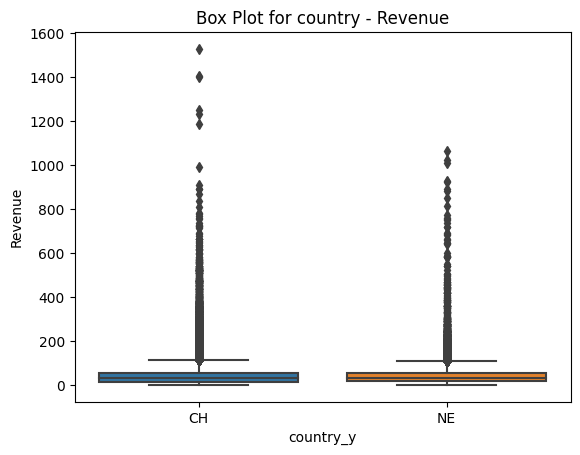

In [289]:
# Boxplot for quantity
sns.boxplot(data=df_join_without_outliers, x='country_y', y='revenue')
plt.ylabel("Revenue")
plt.title("Box Plot for country - Revenue")
plt.show()

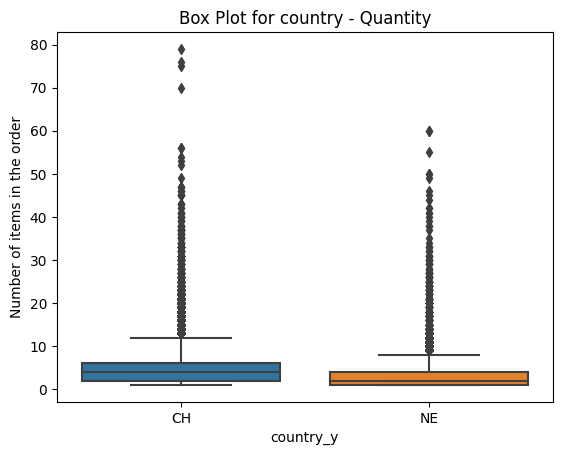

In [290]:
# Boxplot for quantity
sns.boxplot(data=df_join_without_outliers, x='country_y', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Box Plot for country - Quantity")
plt.show()

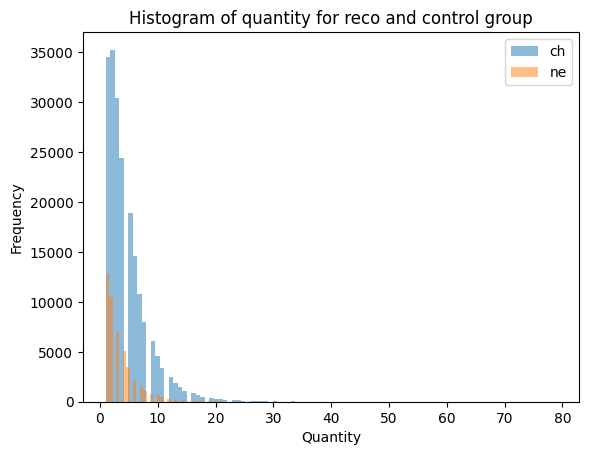

In [298]:
plt.hist(x = df_join_without_outliers['quantity'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['quantity'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of quantity by country')
plt.show()

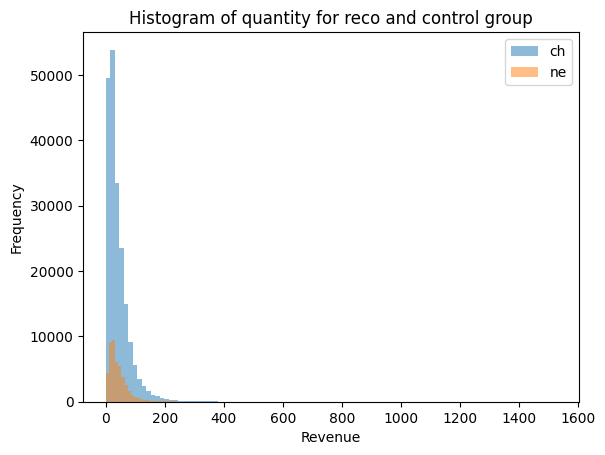

In [304]:
plt.hist(x = df_join_without_outliers['revenue'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['revenue'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of revenue by country')
plt.show()

In [295]:


### For revenue
print("T-test for revenue without outliners: ")
print("")

data_reco_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['country_y']=="CH"]
data_control_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['country_y']=="NE"]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print("")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest)
print("")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats)
print("")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")



T-test for revenue without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.6937749981880188, pvalue=0.0)
ShapiroResult(statistic=0.6472995281219482, pvalue=0.0)

F-test - Homogeneity test: 
(1.0566249262399448, 2.6423307986078726e-14)

Ttest_indResult(statistic=-3.897011626529332, pvalue=9.74124655323286e-05)

               T           dof alternative     p-val           CI95%  \
T-test -3.964757  70842.590728   two-sided  0.000074  [-1.27, -0.43]   

         cohen-d    BF10     power  
T-test  0.020051  15.026  0.973629  
---------------------------------


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


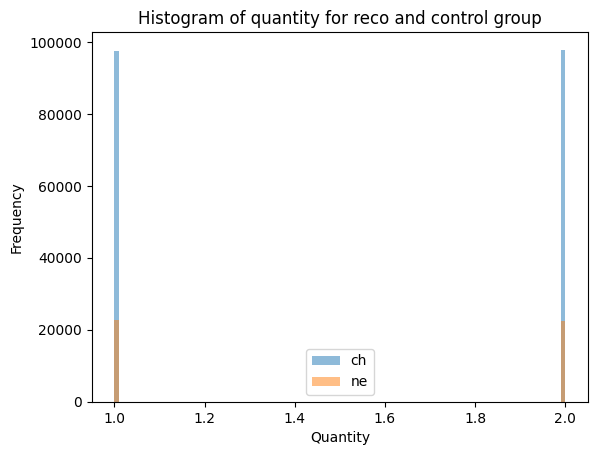

In [300]:
plt.hist(x = df_join_without_outliers['abUser'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['abUser'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of quantity for reco and control group')
plt.show()

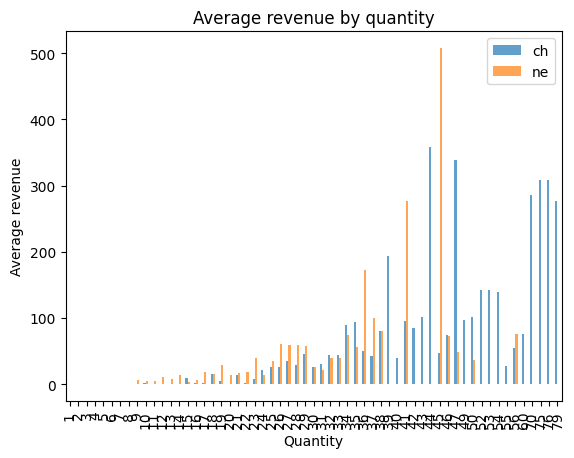

In [323]:
grouped_data = df_join_without_outliers.groupby(['quantity', 'country_y'])['revenue'].max().unstack()

ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(["ch","ne"])
plt.show()


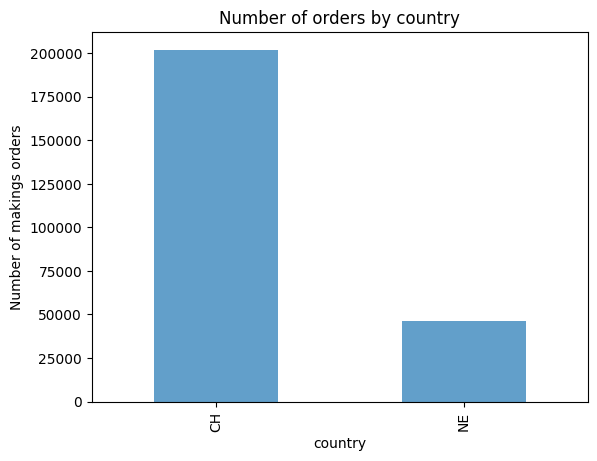

In [309]:
grouped_data_by_country = df_join_without_outliers.groupby(['country_y'])['quantity'].count()

ax = grouped_data_by_country.plot(kind='bar', alpha=0.7)
ax.set_title("Number of orders by country")
ax.set_ylabel('Number of makings orders')
ax.set_xlabel('country')
plt.show()

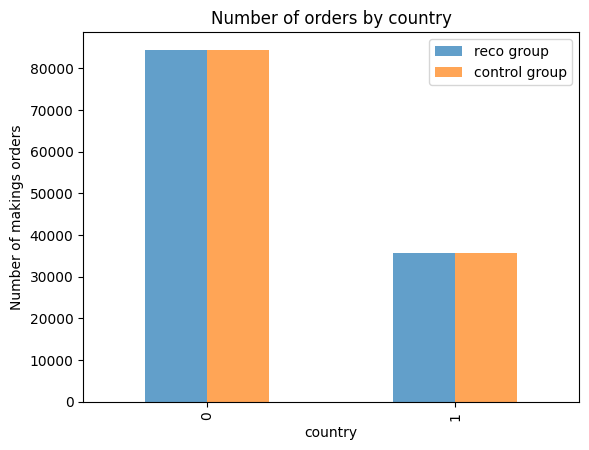

In [322]:
grouped_data_by_country = df_join_without_outliers.groupby(['isNew',"abUser"])['quantity'].count().unstack()

ax = grouped_data_by_country.plot(kind='bar', alpha=0.7)
ax.set_title("Number of orders by country")
ax.set_ylabel('Number of makings orders')
ax.set_xlabel('country')
ax.legend(['reco group', 'control group'])
plt.show()

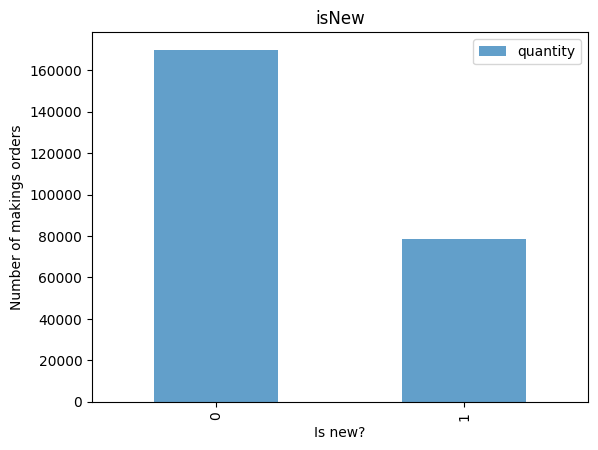

In [328]:
grouped_data_by_country = df_join_without_outliers.groupby(["isNew"])['quantity'].count()

ax = grouped_data_by_country.plot(kind='bar', alpha=0.7)
ax.set_title("isNew")
ax.set_ylabel('Number of makings orders')
ax.set_xlabel('Is new?')
ax.legend()
plt.show()

#### tests for country

In [315]:


### For revenue
print("T-test for revenue without outliners: ")
print("")

data_reco_without_outliers1 = df_join_without_outliers['quantity'][df_join_without_outliers['country_y']=="CH"]
data_control_without_outliers1 = df_join_without_outliers['quantity'][df_join_without_outliers['country_y']=="NE"]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print("")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest)
print("")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats)
print("")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")



T-test for revenue without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.7999206781387329, pvalue=0.0)
ShapiroResult(statistic=0.715840220451355, pvalue=0.0)

F-test - Homogeneity test: 
(1.4562919426726508, 1.1102230246251565e-16)

Ttest_indResult(statistic=59.088964690810535, pvalue=0.0)

                T           dof alternative  p-val         CI95%  cohen-d  \
T-test  66.409641  80736.926481   two-sided    0.0  [1.08, 1.15]  0.30402   

       BF10  power  
T-test  inf    1.0  
---------------------------------


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\pingouin\bayesian.py:152: RuntimeWarning: divide by zero encountered in double_scalars
  bf10 = 1 / ((1 + t**2 / df) ** (-(df + 1) / 2) / integr)


In [316]:


### For revenue
print("T-test for revenue without outliners: ")
print("")

data_reco_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['country_y']=="CH"]
data_control_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['country_y']=="NE"]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print("")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest)
print("")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats)
print("")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")



T-test for revenue without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.6937749981880188, pvalue=0.0)
ShapiroResult(statistic=0.6472995281219482, pvalue=0.0)

F-test - Homogeneity test: 
(1.0566249262399448, 2.6423307986078726e-14)

Ttest_indResult(statistic=-3.897011626529332, pvalue=9.74124655323286e-05)

               T           dof alternative     p-val           CI95%  \
T-test -3.964757  70842.590728   two-sided  0.000074  [-1.27, -0.43]   

         cohen-d    BF10     power  
T-test  0.020051  15.026  0.973629  
---------------------------------


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


### First task


###### Is the ratio of users in the reco group and users in the test group really 50:50? 
###### Can you test it by an appropriate statistical test? 
###### Do you prefer to test it on a daily basis, or to run one test for the whole period? 
###### If you run multiple tests, do you need all of them to have positive results to verify the 50:50 distribution hypothesis? 

#### step 1

In [337]:
# create two group by country
df_clients_ch = df_clients[df_clients['country']=="CH"]
df_clients_ne = df_clients[df_clients['country']=="NE"]

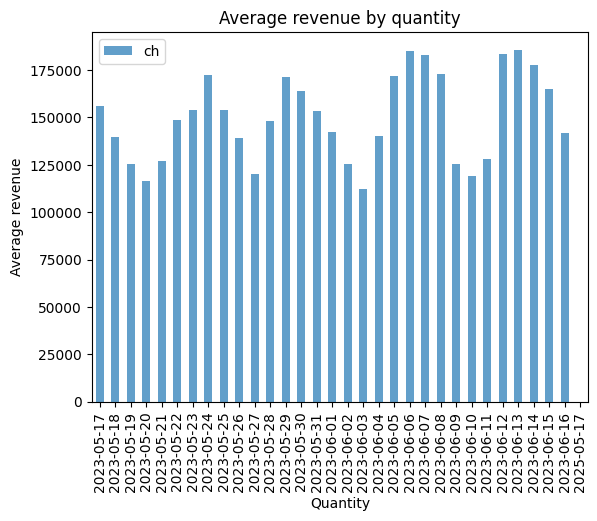

In [338]:
grouped_data = df_clients_ch.groupby(["date"])['abUser'].count()

ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity for CH')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
plt.show()

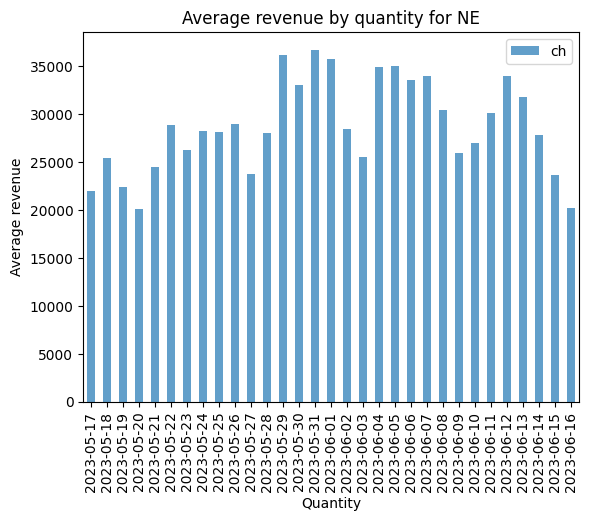

In [339]:
grouped_data = df_clients_ne.groupby(["date"])['abUser'].count()

ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity for NE')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
plt.show()

#### Binomial test for all group

In [345]:
df_clients_ch_reco = df_clients_ch['abUser'][df_clients_ch['abUser']==1]
df_clients_ch_control = df_clients_ch['abUser'][df_clients_ch['abUser']==2]

print(len(df_clients_ch))
print(len(df_clients_ch_reco))
print(len(df_clients_ch_control))
print(len(df_clients_ch_reco+df_clients_ch_control))

4667961
2323144
2325837
4648981


In [352]:
# binomial test
# https://www.statology.org/binomial-test-python/
observed_success = len(df_clients_ch_reco)
total_items = len(df_clients_ch_reco) + len(df_clients_ch_control)
expected_proportion = 0.5


binom = stats.binomtest(observed_success, total_items, expected_proportion, alternative='two-sided')
p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative='two-sided')
print(f"Binomial test: {binom}")
print(f"P-value: {p_value}")


C:\Users\klara\AppData\Local\Temp\ipykernel_9916\3586452780.py:9: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative='two-sided')


Binomial test: BinomTestResult(k=2323144, n=4648981, alternative='two-sided', statistic=0.4997103666373341, pvalue=0.21183998330641512)
P-value: 0.21183998330641512


#### For each day create binomial test

In [357]:
# make it for each day
unique_days = df_clients_ch['date'].unique()
print(unique_days)
print(range(len(unique_days)))



['2023-05-17' '2025-05-17' '2023-05-18' '2023-05-19' '2023-05-20'
 '2023-05-21' '2023-05-22' '2023-05-23' '2023-05-24' '2023-05-25'
 '2023-05-26' '2023-05-27' '2023-05-28' '2023-05-29' '2023-05-30'
 '2023-06-01' '2023-06-09' '2023-06-06' '2023-06-03' '2023-06-05'
 '2023-05-31' '2023-06-08' '2023-06-11' '2023-06-02' '2023-06-10'
 '2023-06-04' '2023-06-07' '2023-06-12' '2023-06-16' '2023-06-15'
 '2023-06-14' '2023-06-13']
range(0, 32)


In [359]:
from datetime import datetime

In [370]:
# check the date
start_date = datetime(2023, 5, 17)
end_date = datetime(2023, 6, 16)

# Convert the 'date' column to datetime objects
df_clients_ch['date'] = pd.to_datetime(df_clients_ch['date'])

# Filter the DataFrame to keep only rows within the date range
filtered_df_clients_ch = df_clients_ch[(df_clients_ch['date'] >= start_date) & (df_clients_ch['date'] <= end_date)]

print(len(filtered_df_clients_ch))
print(len(df_clients_ch))


C:\Users\klara\AppData\Local\Temp\ipykernel_9916\423587951.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clients_ch['date'] = pd.to_datetime(df_clients_ch['date'])


4667960
4667961


In [371]:
# make it for each day
filtered_df_clients_ch['date'] = filtered_df_clients_ch['date'].dt.strftime('%Y-%m-%d')

print(unique_days)
print(range(len(unique_days)))

['2023-05-17' '2023-05-18' '2023-05-19' '2023-05-20' '2023-05-21'
 '2023-05-22' '2023-05-23' '2023-05-24' '2023-05-25' '2023-05-26'
 '2023-05-27' '2023-05-28' '2023-05-29' '2023-05-30' '2023-06-01'
 '2023-06-09' '2023-06-06' '2023-06-03' '2023-06-05' '2023-05-31'
 '2023-06-08' '2023-06-11' '2023-06-02' '2023-06-10' '2023-06-04'
 '2023-06-07' '2023-06-12' '2023-06-16' '2023-06-15' '2023-06-14'
 '2023-06-13']
range(0, 31)


C:\Users\klara\AppData\Local\Temp\ipykernel_9916\1208540912.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df_clients_ch['date'] = filtered_df_clients_ch['date'].dt.strftime('%Y-%m-%d')


In [372]:
print(len(filtered_df_clients_ch))
print(len(df_clients_ch))


4667960
4667961


In [382]:
day = 1
print(filtered_df_clients_ch[filtered_df_clients_ch['date']==unique_days[day]] )
#df_current_day_reco = filtered_df_clients_ch(filtered_df_clients_ch['date'] == unique_days[day])

              date country               sessionID            clientID  isNew  \
146377  2023-05-18      CH  49176f3x96474.qxqqzxni   9798x96a4.4917647      0   
146378  2023-05-18      CH   49176f3x9974f.ai7uc46  4736a76314.4913447      0   
146379  2023-05-18      CH  49176f3x998a6.skntc1ex   af1xa89xx.49176f4      1   
146380  2023-05-18      CH  49176f3x9f383.6y8zlsx1  a4766a9aa7.4916xf8      0   
146381  2023-05-18      CH  49176f3xx3616.jbp4c3xf   4a697344a3.49176f      1   
...            ...     ...                     ...                 ...    ...   
443602  2023-05-18      CH  491773874xxa6.8ftftal7   x1767x847.4916436      0   
443603  2023-05-18      CH   49177387aa419.4an1vsz  4fa63394a6.491766x      0   
443604  2023-05-18      CH  49177387a7383.p74hc6em  4a78aaa991.4917736      1   
443605  2023-05-18      CH  49177387a8479.6maag9lg   a78163f8f.49xax77      0   
443606  2023-05-18      CH   49177387ax641.ynlzzrm   a98a663x7.4987941      1   

        abUser  orderNumber

In [385]:
for day in range(len(unique_days)):
    df_current_day_reco = filtered_df_clients_ch[(filtered_df_clients_ch['date'] == unique_days[day]) & (filtered_df_clients_ch['abUser'] == 1)]
    df_current_day_control = filtered_df_clients_ch[(filtered_df_clients_ch['date'] == unique_days[day]) & (filtered_df_clients_ch['abUser'] == 2)]
    observed_success = len(df_current_day_reco)
    total_items = len(df_current_day_reco) + len(df_current_day_control)
    expected_proportion = 0.5


    binom = stats.binomtest(observed_success, total_items, expected_proportion, alternative='two-sided')
    p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative='two-sided')
    print(f"P-value: {p_value}")
    
# print(f"Binomial test: {binom}")
# print(f"P-value: {p_value}")




    


C:\Users\klara\AppData\Local\Temp\ipykernel_9916\1159503450.py:10: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative='two-sided')


P-value: 0.0036788591733364242
P-value: 0.0031994340568349093
P-value: 0.18781401866151415
P-value: 0.47299125921420626
P-value: 0.9350802405297021
P-value: 0.06968861091256119
P-value: 0.49434862312261746
P-value: 0.22872913221014693
P-value: 0.028807256797139896
P-value: 0.08938101313140676
P-value: 0.4379551569785194
P-value: 0.6589468139306514
P-value: 0.09909644441902091
P-value: 0.10518105007150368
P-value: 0.5348154796706125
P-value: 0.09936529324205012
P-value: 0.7083051717289952
P-value: 0.043719226640425046
P-value: 0.4288607767016227
P-value: 0.1539271231854299
P-value: 0.2954802409140593
P-value: 0.5131472955738438
P-value: 0.8589477939021777
P-value: 0.7279204636081124
P-value: 0.3554238228899703
P-value: 0.11743102210305796
P-value: 0.23361248733132076
P-value: 0.582336056706251
P-value: 0.6452844398085377
P-value: 0.22526027463859244
P-value: 0.19310108114751579


In [392]:
# Second method with binomial test
def binomial_test(df_group1,df_group2, expected_proportion, alt ):
    observed_success = len(df_group1)
    total_items = len(df_group1) + len(ddf_group2)
    binom = stats.binomtest(observed_success, total_items, expected_proportion, alternative=alt)
    p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)
    print(f"Binomial test: {binom}")
    print(f"P-value: {p_value}")
    return p_value

# CH
reco_count = df_clients_ch['abUser'][(df_clients_ch['abUser']==1) | (df_clients_ch['abUser']==2)]
other_count = df_clients_ch[(df_clients_ch['abUser']).isna()]

print(len(reco_count))
print(len(other_count))
print(len(df_clients_ch))
print(len(reco_count)+len(other_count))

4648981
18980
4667961
4667961


### Binomial test for check share of users with an unassigned group

In [393]:
# Devided into two groups by country
df_clients_ch = df_clients[df_clients['country']=="CH"]
df_clients_ne = df_clients[df_clients['country']=="NE"]

In [396]:
# Second method with binomial test
def binomial_test(df_group1,df_group2, expected_proportion, alt ):
    observed_success = len(df_group1)
    total_items = len(df_group1) + len(df_group2)
    binom = stats.binomtest(observed_success, total_items, expected_proportion, alternative=alt)
    p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)
    print(f"Binomial test: {binom}")
    print(f"P-value: {p_value}")
    return p_value

# CH
assigned_group_ch = df_clients_ch['abUser'][(df_clients_ch['abUser']==1) | (df_clients_ch['abUser']==2)]
unassigned_group_ch = df_clients_ch[(df_clients_ch['abUser']).isna()]
p_value_ch = binomial_test(unassigned_group_ch, assigned_group_ch, 0.005, 'less')
print(p_value_ch)

# NE
assigned_group_ne = df_clients_ne['abUser'][(df_clients_ne['abUser']==1) | (df_clients_ne['abUser']==2)]
unassigned_group_ne = df_clients_ne[(df_clients_ne['abUser']).isna()]
p_value_ne = binomial_test(unassigned_group_ne, assigned_group_ne, 0.005, 'less')
print(p_value_ne)

Binomial test: BinomTestResult(k=18980, n=4667961, alternative='less', statistic=0.004066015118806691, pvalue=1.926204798843001e-192)
P-value: 1.926204798843001e-192
1.926204798843001e-192
Binomial test: BinomTestResult(k=3458, n=894209, alternative='less', statistic=0.0038671048938223613, pvalue=1.322548938224104e-56)
P-value: 1.322548938224104e-56
1.322548938224104e-56


C:\Users\klara\AppData\Local\Temp\ipykernel_9916\2343742424.py:6: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)


### Create reco and control group analysis for both of countries

In [ ]:
def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value


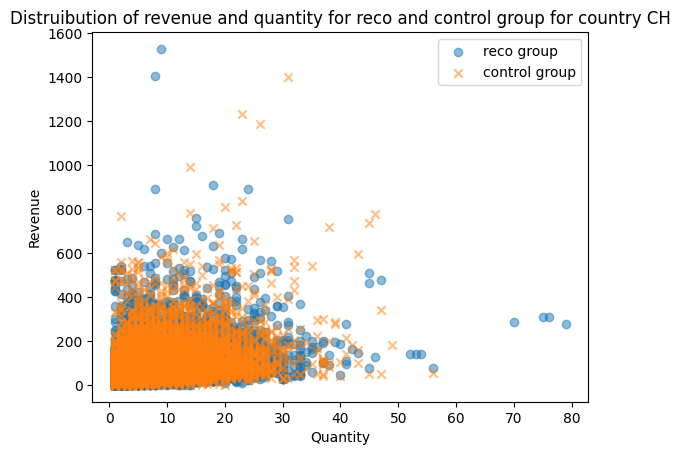

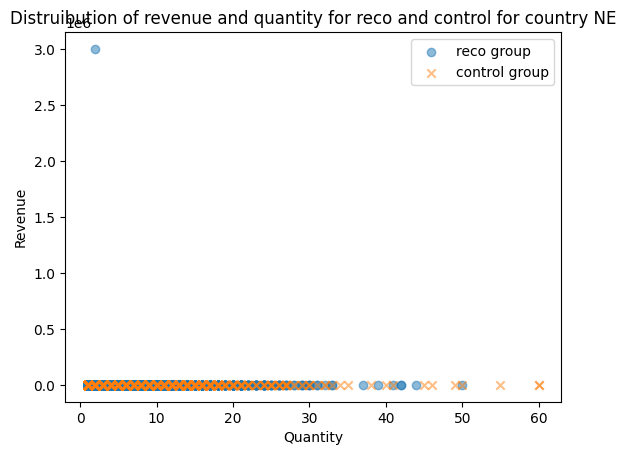

In [401]:
# Check the distribution of the data for quantity and revenue
df_join = df_join_ch
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group for country CH')
plt.show()

df_join = df_join_ne
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control for country NE')
plt.show()

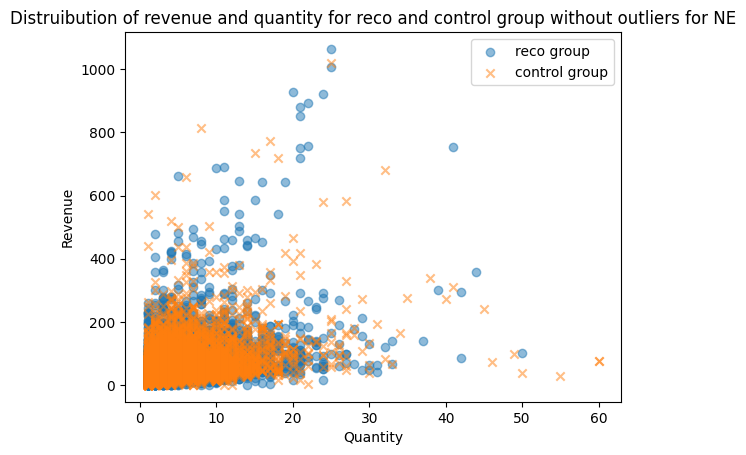

In [403]:
# Drop outliers from NE dataframe

df_join_without_outliers = df_join_ne.drop(reco_max)

# Plot of distribution without outliers
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group without outliers for NE')
plt.show()

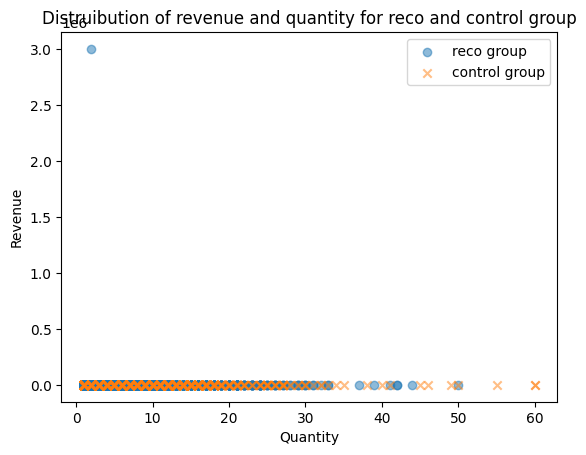

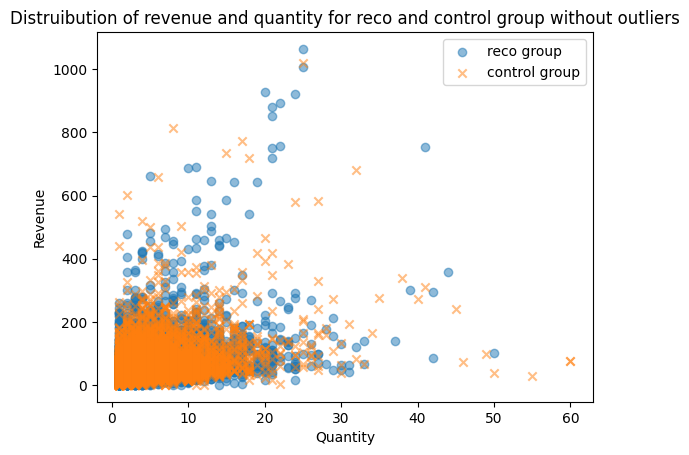

In [399]:
# Set of plots to compare the distribution of the data
# plot relationship between quantity and revenue

df_join = df_join_ne
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group')
plt.show()

### detected outliner, which does not change the mean quantity result

reco_max = df_join['revenue'][df_join['abUser']==1].idxmax()

df_join_without_outliers = df_join.drop(reco_max)

# Plot of distribution without outliers
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group without outliers')
plt.show()

In [ ]:
#•	Does the “reco group” earn, on average, a greater revenue? Does it have larger orders? 
# Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?

# reco group =  abUser == 1
# control group = abUser == 2

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value



reco_mean = df_join['revenue'][df_join['abUser']==1].mean() 
control_mean = df_join['revenue'][df_join['abUser']==2].mean()

# plot relationship between quantity and revenue
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group')
plt.show()

### detected outliner, which does not change the mean quantity result

reco_max = df_join['revenue'][df_join['abUser']==1].idxmax()

df_join_without_outliers = df_join.drop(reco_max)

# Plot of distribution without outliers
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group without outliers')
plt.show()

# T-test for independent samples unpair
# For data without outliers

# from https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

### For revenue
print("T-test for revenue without outliners: ")
print("")

data_reco_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1]
data_control_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue)
print("")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest)
print("")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats)
print("")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")

### For quantity
print("T-test for quantity without outliners: ")
print("")
data_reco_without_outliers2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1]
data_control_without_outliers2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2]

# Shapiro-wilk test - Normality test:
test_normality_reco_quantity = stats.shapiro(data_reco_without_outliers2)
test_normality_control_quantity = stats.shapiro(data_control_without_outliers2)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_quantity)
print(test_normality_control_quantity)
print("")

# perdom F test - Homogeneity test
control_ftest = f_test(data_reco_without_outliers2,data_control_without_outliers2)
print("F-test - Homogeneity test: ")
print(control_ftest)
print("")

# Two ways to calculate t-test
result_stats2 = stats.ttest_ind(a=data_reco_without_outliers2, b=data_control_without_outliers2, equal_var=True)

print(result_stats2)
print("")

result2 = pg.ttest(data_reco_without_outliers2,
                  data_control_without_outliers2,
                  correction=True)
print(result2)

# Boxplot for revenue
sns.boxplot(data=df_join_without_outliers, x='abUser', y='revenue')
plt.ylabel("Revenue")
plt.title("Box Plot for Reco and Control Group - Revenue")
plt.show()

# Boxplot for quantity
sns.boxplot(data=df_join_without_outliers, x='abUser', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Box Plot for Reco and Control Group - Quantity")
plt.show()

# Histogram for quantity
plt.hist(x = df_join['quantity'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['quantity'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend(['reco group', 'control group'])
plt.title('Histogram of quantity for reco and control group')
plt.show()

# Visualization of average revenue by quantity
grouped_data = df_join_without_outliers.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(['reco group', 'control group'])
plt.show()


# Visualization of average revenue by quantity for most common quantity
filtered_df = df_join_without_outliers[df_join_without_outliers['quantity'].between(1, 10)]
grouped_data_filtered = filtered_df.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data_filtered.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(['reco group', 'control group'])
plt.show()

### Diference between country

# Number of orders by country
grouped_data_by_country = df_join_without_outliers.groupby(['country_y'])['quantity'].count()
ax = grouped_data_by_country.plot(kind='bar', alpha=0.7)
ax.set_title("Number of orders by country")
ax.set_ylabel('Number of makings orders')
ax.set_xlabel('country')
plt.show()

# Frequency of revenue by country
plt.hist(x = df_join_without_outliers['revenue'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['revenue'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of revenue by country')
plt.show()

# Frequency of quantity by country
plt.hist(x = df_join_without_outliers['quantity'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['quantity'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of quantity by country')
plt.show()

# Boxplot for quantity
sns.boxplot(data=df_join_without_outliers, x='country_y', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Box Plot for country - Quantity")
plt.show()

### GA in order 

In [421]:
df_join_ch = df_clients_ch.merge(df_orders, on='orderNumber', how='inner') # inner join
df_join_ne = df_clients_ne.merge(df_orders, on='orderNumber', how='inner') # inner join


df_join_count_ch = df_join_ch['orderNumber'].count() # number of common orders in both dataframes
df_clients_ch_count = df_clients_ch['orderNumber'].count() # number of orders in df_clients (GA)
share_ch = 1-(df_join_count_ch/df_clients_ch_count) # share of orders that are NOT in GA data

print("Share of orders that are not in GA data for CH: {:.2f}%".format(share_ch*100))

df_join_count_ne = df_join_ne['orderNumber'].count() # number of common orders in both dataframes
df_clients_ne_count = df_clients_ne['orderNumber'].count() # number of orders in df_clients
share_ne = 1-(df_join_count_ne/df_clients_ne_count) # share of orders that are not in GA data

print("Share of orders that are not in GA data for NA: {:.2f}%".format(share_ne*100))

Share of orders that are not in GA data for CH: 10.07%
Share of orders that are not in GA data for NA: 2.60%


In [405]:
### •	What about the orders that are not in GA data? What is their share? How do you propose to handle them?
df_join_ch = df_clients_ch.merge(df_orders, on='orderNumber', how='inner') # inner join
df_join_ne = df_clients_ne.merge(df_orders, on='orderNumber', how='inner') # inner join


df_join_count_ch = df_join_ch['orderNumber'].count() # number of common orders in both dataframes
df_clients_ch_count = df_clients_ch['orderNumber'].count() # number of orders in df_clients (GA)
share_ch = 1-(df_join_count_ch/df_clients_ch_count) # share of orders that are NOT in GA data

print(df_join_count_ch)
print(df_clients_ch_count)




201951
224559


In [413]:
df_orders_ch = df_orders[df_orders['country']=="CH"]

In [414]:
# Chcek unique row
df_check_GA = df_clients_ch.drop_duplicates(subset=["orderNumber"], keep='first')
df_check_orders = df_orders_ch.drop_duplicates(subset=["orderNumber"], keep='first')

print(len(df_clients_ch))
print(len(df_check_GA))
print("------------------")
print(len(df_orders_ch))
print(len(df_check_orders))



4667961
224555
------------------
206842
206842


In [415]:
df_join_ch = df_clients_ch.merge(df_orders_ch, on='orderNumber', how='inner') # inner join
print(len(df_join_ch))

201951


In [416]:
df_join_ch_check = df_check_GA.merge(df_check_orders, on='orderNumber', how='inner') # inner join
print(len(df_join_ch_check))

201951


In [ ]:
df_join_ch = df_clients_ch.merge(df_orders, on='orderNumber', how='inner') # inner join
df_join_ne = df_clients_ne.merge(df_orders, on='orderNumber', how='inner') # inner join


df_join_count_ch = df_join_ch['orderNumber'].count() # number of common orders in both dataframes
df_clients_ch_count = df_clients_ch['orderNumber'].count() # number of orders in df_clients (GA)
share_ch = 1-(df_join_count_ch/df_clients_ch_count) # share of orders that are NOT in GA data

print("Share of orders that are not in GA data for CH: {:.2f}%".format(share_ch*100

In [429]:
df_orders_ch = df_orders_ch.drop_duplicates(subset=["orderNumber"], keep='first') # drop duplicates 
df_orders_ch = df_orders_ch.dropna(subset=["orderNumber"]) # drop NaN

df_join_ch = df_clients_ch.merge(df_orders_ch, on="orderNumber", how="inner") # join tables
share_orders_not_in_GA_ch = 1-(len(df_join_ch) / len(df_orders_ch)) # share of orders not in GA

print("Share of orders that are not in GA data for CH: {:.2f}%".format(share_orders_not_in_GA_ch *100))

Share of orders that are not in GA data for CH: 2.36%


In [428]:
print(len(df_orders_ch))
df_orders_ch = df_orders_ch.drop_duplicates(subset=["orderNumber"], keep='first') # drop duplicates
df_orders_ch= df_orders_ch.dropna(subset=["orderNumber"]) # drop NaN
print(len(df_orders_ch))

206842
206842


In [424]:
df_orders_ne = df_orders_ne.drop_duplicates(subset=["orderNumber"], keep='first') # drop duplicates 
df_orders_ne= df_orders_ne.dropna(subset=["orderNumber"]) # drop NaN

df_join_ch = df_orders_ne.merge(df_orders_ne, on="orderNumber", how="inner") # join tables
share_orders_not_in_GA_ch = len(df_join_ch) / len(df_orders_ch) # share of orders not in GA

print("Share of orders that are not in GA data for CH: {:.2f}%".format(share_ch*100))

Share of orders that are not in GA data for CH: 10.07%


In [430]:
df_join_count_ne = df_join_ne['orderNumber'].count() # number of common orders in both dataframes
df_clients_ne_count = df_clients_ne['orderNumber'].count() # number of orders in df_clients
share_ne = 1-(df_join_count_ne/df_clients_ne_count) # share of orders that are not in GA data

print("Share of orders that are not in GA data for NA: {:.2f}%".format(share_ne*100))

Share of orders that are not in GA data for NA: 2.60%


In [431]:
df_join_ne = df_clients_ne.merge(df_orders_ne, on="orderNumber", how="inner") # join tables
share_orders_not_in_GA_ne = 1-(len(df_join_ne) / len(df_orders_ne)) # share of orders not in GA

print("Share of orders that are not in GA data for CH: {:.2f}%".format(share_orders_not_in_GA_ne *100))

Share of orders that are not in GA data for CH: 0.06%


### FIRST TASK

In [432]:
################################################################################################################
# Analysis of abUser column
abUser_unique = df_clients['abUser'].unique() # 99 is not present here (just NaN)
txt = "Unique values in abUser: {}"
print(txt.format(abUser_unique))

################################################################################################################
# Devided into two groups by country
df_clients_ch = df_clients[df_clients['country']=="CH"]
df_clients_ne = df_clients[df_clients['country']=="NE"]

df_orders_ch = df_orders[df_orders['country']=="CH"]
df_orders_ne = df_orders[df_orders['country']=="NE"]

################################################################################################################
### Check the date
# •	Is the test running for the correct period?
def correct_period(df, start_date, end_date):
    df['date'] = pd.to_datetime(df['date'])
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    filtered_df['date'] = filtered_df['date'].dt.strftime('%Y-%m-%d')
    return filtered_df

start_date = datetime(2023, 5, 17)
end_date = datetime(2023, 6, 16)

df_clients_ch = correct_period(df_clients_ch, start_date, end_date) # data in correct period
df_clients_ne = correct_period(df_clients_ne, start_date, end_date) # data in correct period

################################################################################################################
### Delete duplicates and NaN

df_orders_ch = df_orders_ch.drop_duplicates(subset=["orderNumber"], keep='first') # drop duplicates
df_orders_ch= df_orders_ch.dropna(subset=["orderNumber"]) # drop NaN

df_orders_ne = df_orders_ne.drop_duplicates(subset=["orderNumber"], keep='first') # drop duplicates 
df_orders_ne= df_orders_ne.dropna(subset=["orderNumber"]) # drop NaN


Unique values in abUser: [ 1.  2. nan]


C:\Users\klara\AppData\Local\Temp\ipykernel_9916\1957408485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\klara\AppData\Local\Temp\ipykernel_9916\1957408485.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['date'].dt.strftime('%Y-%m-%d')
C:\Users\klara\AppData\Local\Temp\ipykernel_9916\1957408485.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [496]:
# Step
# sort dataframe by date
# drop duplicated client id and keep the first one

# Sort dataframe by date
df_clients_ch = df_clients_ch.sort_values(by=['date'])

# Drop duplicated client id and keep the first one
print(len(df_clients_ch))
df_clients_ch = df_clients_ch.drop_duplicates(subset=['clientID'], keep='first')
print(len(df_clients_ch))
filtered_df_clients_ch

2062167
2062167


,date,country,sessionID,clientID,isNew,abUser,orderNumber
62122,2023-05-17,NE,49176799a9161.t74z1fax,496974f13.4916f4x9,0,1.0,NaN
62123,2023-05-17,NE,491767996axx3.8wiqjmss,a1a916188.4916f41,0,2.0,NaN
62124,2023-05-17,NE,491767996996a.eqf4mwy,1ax7x7498.4917678,1,2.0,NaN
62125,2023-05-17,NE,49176799789x9.wzxxrad,4axx4afx89.4917a96,0,1.0,NaN
62126,2023-05-17,NE,4917679979f64.7aqwcrcx,a9afa3x94.49176798,0,1.0,NaN
...,...,...,...,...,...,...,...
5549067,2023-06-13,NE,49199197f3a6x.m6zcypp,619693484.4919919,0,1.0,NaN
5549068,2023-06-13,NE,4919919836f41.umvffcd,4817ax136.491991ax,0,2.0,247886598.0
5549069,2023-06-13,NE,491991983x489.bmm643k1,46f1f7893f.49x799a,0,2.0,NaN
5549070,2023-06-13,NE,49199198a4f97.ovzff6o,4638x13x49.4919918,1,2.0,NaN


In [ ]:
def binomial_test(df_group1,df_group2, expected_proportion, alt ):
    observed_success = len(df_group1)
    total_items = len(df_group1) + len(df_group2)
    binom = stats.binomtest(observed_success, total_items, expected_proportion, alternative=alt)
    p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)
    print(f"Binomial test: {binom}")
    print(f"P-value: {p_value}")
    return p_value

In [445]:
unique_days = df_clients_ch['date'].unique()
print(unique_days)
print(len(unique_days))

['2023-05-17' '2023-05-18' '2023-05-19' '2023-05-20' '2023-05-21'
 '2023-05-22' '2023-05-23' '2023-05-24' '2023-05-25' '2023-05-26'
 '2023-05-27' '2023-05-28' '2023-05-29' '2023-05-30' '2023-05-31'
 '2023-06-01' '2023-06-02' '2023-06-03' '2023-06-04' '2023-06-05'
 '2023-06-06' '2023-06-07' '2023-06-08' '2023-06-09' '2023-06-10'
 '2023-06-11' '2023-06-12' '2023-06-13' '2023-06-14' '2023-06-15'
 '2023-06-16']
31


In [466]:
unique_days = df_clients_ch['date'].unique()
filtered_df_clients_ch = df_clients_ne

for day in range(len(unique_days)):
    df_current_day_reco = filtered_df_clients_ch[(filtered_df_clients_ch['date'] == unique_days[day]) & (filtered_df_clients_ch['abUser'] == 1)]
    df_current_day_control = filtered_df_clients_ch[(filtered_df_clients_ch['date'] == unique_days[day]) & (filtered_df_clients_ch['abUser'] == 2)]
    
    observed_success = len(df_current_day_reco)
    total_items = len(df_current_day_reco) + len(df_current_day_control)
    expected_proportion = 0.5

    binom = stats.binomtest(observed_success, total_items, expected_proportion, alternative='two-sided')
    p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative='two-sided')
    # print(f"P-value: {p_value}")
    if p_value < 0.05:
        print(f"Day {unique_days[day]} is significant")
        #print(p_value)

C:\Users\klara\AppData\Local\Temp\ipykernel_9916\2526562846.py:13: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative='two-sided')


Day 2023-05-25 is significant
Day 2023-05-28 is significant
Day 2023-05-29 is significant
Day 2023-06-01 is significant
Day 2023-06-02 is significant
Day 2023-06-12 is significant
Day 2023-06-13 is significant
Day 2023-06-14 is significant


In [447]:
df_current_day_reco = filtered_df_clients_ch[(filtered_df_clients_ch['abUser'] == 1)]
df_current_day_control = filtered_df_clients_ch[ (filtered_df_clients_ch['abUser'] == 2)]

observed_success = len(df_current_day_reco)
total_items = len(df_current_day_reco) + len(df_current_day_control)
expected_proportion = 0.5

binom = stats.binomtest(observed_success, total_items, expected_proportion, alternative='two-sided')
p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative='two-sided')

print('p-value: ', p_value)

C:\Users\klara\AppData\Local\Temp\ipykernel_9916\2640770461.py:9: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative='two-sided')


p-value:  0.9123887894732885


In [461]:
def binomial_test(df_group1,df_group2, expected_proportion, alt):
    observed_success = len(df_group1)
    total_items = len(df_group1) + len(df_group2)
    binom = stats.binomtest(observed_success, total_items, expected_proportion, alternative=alt)
    p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)
    return p_value, binom

In [465]:
unique_days = df_clients_ne['date'].unique()
filtered_df_clients_ch = df_clients_ne

def filter_day_and_abUser (df,day, abUser):
    return df[(df['date'] == unique_days[day]) & (df['abUser'] == abUser)]
    
for day in range(len(unique_days)):
    df_current_day_reco = filter_day_and_abUser(df_clients_ne,day,1)
    df_current_day_control = filter_day_and_abUser(df_clients_ne,day,2)
    share = 0.5
    p_value,binom_test = binomial_test(df_current_day_reco, df_current_day_control, share, "two-sided")

    if p_value < 0.05:
        print(f"Day {unique_days[day]} is significant")

C:\Users\klara\AppData\Local\Temp\ipykernel_9916\1748162220.py:5: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)


Day 2023-05-25 is significant
Day 2023-05-28 is significant
Day 2023-05-29 is significant
Day 2023-06-01 is significant
Day 2023-06-02 is significant
Day 2023-06-13 is significant
Day 2023-06-12 is significant
Day 2023-06-14 is significant


In [468]:
### Test for each day

# CH
unique_days = df_clients_ch['date'].unique()

for day in range(len(unique_days)):
    df_current_day_reco = filter_day_and_abUser(df_clients_ch,day,1)
    df_current_day_control = filter_day_and_abUser(df_clients_ch,day,2)
    share = 0.5
    p_value,binom_test = binomial_test(df_current_day_reco, df_current_day_control, share, "two-sided")

    if p_value < 0.05:
        print(f"Day {unique_days[day]} is significant")
    else:
        print(f"Day {unique_days[day]} is not significant")



C:\Users\klara\AppData\Local\Temp\ipykernel_9916\1748162220.py:5: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)


Day 2023-05-17 is not significant
Day 2023-05-18 is not significant
Day 2023-05-19 is not significant
Day 2023-05-20 is not significant
Day 2023-05-21 is not significant
Day 2023-05-22 is not significant
Day 2023-05-23 is not significant
Day 2023-05-24 is not significant
Day 2023-05-25 is not significant
Day 2023-05-26 is not significant
Day 2023-05-27 is not significant
Day 2023-05-28 is not significant
Day 2023-05-29 is not significant
Day 2023-05-30 is not significant
Day 2023-05-31 is not significant
Day 2023-06-01 is not significant
Day 2023-06-02 is not significant
Day 2023-06-03 is not significant
Day 2023-06-04 is not significant
Day 2023-06-05 is not significant
Day 2023-06-06 is not significant
Day 2023-06-07 is not significant
Day 2023-06-08 is not significant
Day 2023-06-09 is not significant
Day 2023-06-10 is not significant
Day 2023-06-11 is not significant
Day 2023-06-12 is not significant
Day 2023-06-13 is not significant
Day 2023-06-14 is not significant
Day 2023-06-15

In [472]:

# NE
unique_days = df_clients_ne['date'].unique()

for day in range(len(unique_days)):
    df_current_day_reco = filter_day_and_abUser(df_clients_ne,day,1)
    df_current_day_control = filter_day_and_abUser(df_clients_ne,day,2)
    share = 0.5
    p_value,binom_test = binomial_test(df_current_day_reco, df_current_day_control, share, "two-sided")

    if p_value < 0.05:
        # print(f"Day {unique_days[day]} is significant")
        day = unique_days[day]
    else:
        print(f"Day {unique_days[day]} is not significant")
        print(f"p-value: {p_value}")

C:\Users\klara\AppData\Local\Temp\ipykernel_9916\1748162220.py:5: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)


Day 2023-05-17 is not significant
p-value: 1.0
Day 2023-05-18 is not significant
p-value: 0.949993835025232
Day 2023-05-19 is not significant
p-value: 0.31323313117651186
Day 2023-05-20 is not significant
p-value: 0.05406865393540103
Day 2023-05-21 is not significant
p-value: 0.24751140368957433
Day 2023-05-22 is not significant
p-value: 0.1215506219900849
Day 2023-05-23 is not significant
p-value: 0.5873774520901797
Day 2023-05-24 is not significant
p-value: 0.5359074033415286
Day 2023-05-26 is not significant
p-value: 0.5414417528798962
Day 2023-05-27 is not significant
p-value: 0.32105422648201587
Day 2023-05-30 is not significant
p-value: 0.23896153148931382
Day 2023-06-10 is not significant
p-value: 0.2656011162576163
Day 2023-06-09 is not significant
p-value: 0.33275961968392115
Day 2023-06-06 is not significant
p-value: 0.3423725645345727
Day 2023-06-03 is not significant
p-value: 0.7543033696419597
Day 2023-06-05 is not significant
p-value: 0.6807495928113013
Day 2023-05-31 is 

In [475]:
def binomial_test(df_group1,df_group2, expected_proportion, alt):
    observed_success = len(df_group1)
    total_items = len(df_group1) + len(df_group2)
    binom = stats.binomtest(observed_success, total_items, expected_proportion, alternative=alt)
    p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)
    return p_value, binom

def filter_day_and_abUser (df,day, abUser):
    return df[(df['date'] == unique_days[day]) & (df['abUser'] == abUser)]

def check_share_of_abUser_each_day (df,unique_days):
    for day in range(len(unique_days)):
        df_current_day_reco = filter_day_and_abUser(df,day,1)
        df_current_day_control = filter_day_and_abUser(df,day,2)
        share = 0.5
        p_value,binom_test = binomial_test(df_current_day_reco, df_current_day_control, share, "two-sided")

        if p_value < 0.05:
            print(f"Day {unique_days[day]} is significant")

### Test for each day

# CH
unique_days = df_clients_ch['date'].unique()

print("Days with significant p-values for CH (if any): ")
check_share_of_abUser_each_day(df_clients_ch,unique_days)

# NE
unique_days = df_clients_ne['date'].unique()

print("Days with significant p-values for NE (if any): ")
check_share_of_abUser_each_day(df_clients_ne,unique_days)
check_share_of_abUser_each_day(df_clients_ne,unique_days)

Significant p-values for CH (if any): 


C:\Users\klara\AppData\Local\Temp\ipykernel_9916\94963065.py:5: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)


Significant p-values for NE (if any): 
Day 2023-05-25 is significant
Day 2023-05-28 is significant
Day 2023-05-29 is significant
Day 2023-06-01 is significant
Day 2023-06-02 is significant
Day 2023-06-13 is significant
Day 2023-06-12 is significant
Day 2023-06-14 is significant


#### For whole period

In [467]:
### Test for whole period
share = 0.5
# CH
df_clients_ch_reco = df_clients_ch['abUser'][df_clients_ch['abUser']==1]
df_clients_ch_control = df_clients_ch['abUser'][df_clients_ch['abUser']==2]

p_value_ch,binom_test_ch = binomial_test(df_clients_ch_reco , df_clients_ch_control, share, "two-sided")

print(f"Binomial test for CH: {binom_test_ch}")
print(f"P-value: {p_value_ch}")

# NE
df_clients_ne_reco = df_clients_ne['abUser'][df_clients_ne['abUser']==1]
df_clients_ne_control = df_clients_ne['abUser'][df_clients_ne['abUser']==2]

p_value_ne,binom_test_ne = binomial_test(df_clients_ne_reco , df_clients_ne_control, share, "two-sided")

print(f"Binomial test for NE: {binom_test_ne}")
print(f"P-value: {p_value_ne}")


C:\Users\klara\AppData\Local\Temp\ipykernel_9916\1748162220.py:5: DeprecationWarning: 'binom_test' is deprecated in favour of 'binomtest' from version 1.7.0 and will be removed in Scipy 1.12.0.
  p_value = stats.binom_test(observed_success, total_items, expected_proportion, alternative=alt)


Binomial test for CH: BinomTestResult(k=1031163, n=2062167, alternative='two-sided', statistic=0.5000385516788892, pvalue=0.9123887894732885)
P-value: 0.9123887894732885
Binomial test for NE: BinomTestResult(k=446456, n=890751, alternative='two-sided', statistic=0.5012130213718536, pvalue=0.022100804894765097)
P-value: 0.022100804894765097


In [479]:

def binomial_test(df_group1,df_group2, expected_proportion, alt):
    observed_success = len(df_group1)
    total_items = len(df_group1) + len(df_group2)
    return stats.binomtest(observed_success, total_items, expected_proportion, alternative=alt)
   

def filter_day_and_abUser (df,day, abUser):
    return df[(df['date'] == unique_days[day]) & (df['abUser'] == abUser)]

def check_share_of_abUser_each_day (df,unique_days):
    for day in range(len(unique_days)):
        df_current_day_reco = filter_day_and_abUser(df,day,1)
        df_current_day_control = filter_day_and_abUser(df,day,2)
        share = 0.5
        binom = binomial_test(df_current_day_reco, df_current_day_control, share, "two-sided")

        if binom.pvalue < 0.05:
            print(f"\tDay {unique_days[day]} is significant")

### Test for each day
print("Test if the ratio of users in the reco group and users in the test group really 50:50\n")


# CH
unique_days = df_clients_ch['date'].unique()

print("Days with significant p-values for CH (if any): ")
check_share_of_abUser_each_day(df_clients_ch,unique_days)

# NE
unique_days = df_clients_ne['date'].unique()

print("Days with significant p-values for NE (if any): ")
check_share_of_abUser_each_day(df_clients_ne,unique_days)

print("---------------------------------")
### Test for whole period
print("Test ration for whole period: ")
share = 0.5

# CH
df_clients_ch_reco = df_clients_ch['abUser'][df_clients_ch['abUser']==1]
df_clients_ch_control = df_clients_ch['abUser'][df_clients_ch['abUser']==2]

binom_ch = binomial_test(df_clients_ch_reco , df_clients_ch_control, share, "two-sided")

print(f"Binomial test for CH: {binom_ch}")

if binom_ch.pvalue < 0.05:
    print("\tThe test is significant")
else:
    print("\tThe test is not significant")

# NE
df_clients_ne_reco = df_clients_ne['abUser'][df_clients_ne['abUser']==1]
df_clients_ne_control = df_clients_ne['abUser'][df_clients_ne['abUser']==2]

binom_ne = binomial_test(df_clients_ne_reco , df_clients_ne_control, share, "two-sided")

print(f"Binomial test for NE: {binom_ne}")

if binom_ne.pvalue < 0.05:
    print("\tThe test is significant")
else:
    print("\tThe test is not significant")

print("---------------------------------")

Test if the ratio of users in the reco group and users in the test group really 50:50

Days with significant p-values for CH (if any): 
Days with significant p-values for NE (if any): 
	Day 2023-05-25 is significant
	Day 2023-05-28 is significant
	Day 2023-05-29 is significant
	Day 2023-06-01 is significant
	Day 2023-06-02 is significant
	Day 2023-06-13 is significant
	Day 2023-06-12 is significant
	Day 2023-06-14 is significant
---------------------------------
Test ration for whole period: 
Binomial test for CH: BinomTestResult(k=1031163, n=2062167, alternative='two-sided', statistic=0.5000385516788892, pvalue=0.9123887894732885)
	The test is not significant
Binomial test for NE: BinomTestResult(k=446456, n=890751, alternative='two-sided', statistic=0.5012130213718536, pvalue=0.022100804894765097)
	The test is significant
---------------------------------


### Unassigned group

In [487]:
# Second method with binomial test
share_unassigned = 0.005
# CH
assigned_group_ch = df_clients_ch['abUser'][(df_clients_ch['abUser']==1) | (df_clients_ch['abUser']==2)]
unassigned_group_ch = df_clients_ch[(df_clients_ch['abUser']).isna()]
binom_ch = binomial_test(unassigned_group_ch, assigned_group_ch, share_unassigned, 'less')

print(f"Binomial test for CH: \n\t{binom_ch}")
if binom_ch.pvalue < 0.05:
    print("\tThe test is significant")
else:
    print("\tThe test is not significant")

# NE
assigned_group_ne = df_clients_ne['abUser'][(df_clients_ne['abUser']==1) | (df_clients_ne['abUser']==2)]
unassigned_group_ne = df_clients_ne[(df_clients_ne['abUser']).isna()]
binom_ne= binomial_test(unassigned_group_ne, assigned_group_ne, share_unassigned, 'less')

print(f"Binomial test for NE: \n\t{binom_ne}")
if binom_ne.pvalue < 0.05:
    print("\tThe test is significant")
else:
    print("\tThe test is not significant")

print("---------------------------------")

Binomial test for CH: 
	BinomTestResult(k=12275, n=2074442, alternative='less', statistic=0.005917253892854078, pvalue=1.0)
	The test is not significant
Binomial test for NE: 
	BinomTestResult(k=3458, n=894209, alternative='less', statistic=0.0038671048938223613, pvalue=1.322548938224104e-56)
	The test is significant
---------------------------------


In [492]:
def unassigned_share(df_clients):
    reco_count = df_clients['abUser'][df_clients['abUser']==1].count()
    control_count = df_clients['abUser'][df_clients['abUser']==2].count()
    other_count = (df_clients['abUser']).isna().sum()
    percent = other_count/((reco_count + control_count + other_count))*100

    if percent < 0.5:
        print("\tThe test is fine, share is below 0.5%.")
        print("\tPercent of users with an unassigned group: {:.2f}%".format(percent))
    else:
        print("\tThe test is not fine, share is {:.2f}%".format(percent))

    return percent

print("Share of users with an unassigned group for CH: ")
share_ch = unassigned_share(df_clients_ch)

print("Share of users with an unassigned group for NE: ")
share_ne = unassigned_share(df_clients_ne)

Share of users with an unassigned group for CH: 
	The test is not fine, share is 0.59%
Share of users with an unassigned group for NE: 
	The test is fine, share is below 0.5%.
	Percent of users with an unassigned group: 0.39%


In [488]:
# Second method with binomial test
share_unassigned = 0.005
# CH
assigned_group_ch = df_clients_ch['abUser'][(df_clients_ch['abUser']==1) | (df_clients_ch['abUser']==2)]
unassigned_group_ch = df_clients_ch['abUser'][(df_clients_ch['abUser']!=1) & (df_clients_ch['abUser']!=2)]
binom_ch = binomial_test(unassigned_group_ch, assigned_group_ch, share_unassigned, 'less')

print(f"Binomial test for CH: \n\t{binom_ch}")
if binom_ch.pvalue < 0.05:
    print("\tThe test is significant")
else:
    print("\tThe test is not significant")

# NE
assigned_group_ne = df_clients_ne['abUser'][(df_clients_ne['abUser']==1) | (df_clients_ne['abUser']==2)]
unassigned_group_ne = df_clients_ne['abUser'][(df_clients_ne['abUser']!=1) & (df_clients_ne['abUser']!=2)]
binom_ne= binomial_test(unassigned_group_ne, assigned_group_ne, share_unassigned, 'less')

print(f"Binomial test for NE: \n\t{binom_ne}")
if binom_ne.pvalue < 0.05:
    print("\tThe test is significant")
else:
    print("\tThe test is not significant")

print("---------------------------------")

Binomial test for CH: 
	BinomTestResult(k=12275, n=2074442, alternative='less', statistic=0.005917253892854078, pvalue=1.0)
	The test is not significant
Binomial test for NE: 
	BinomTestResult(k=3458, n=894209, alternative='less', statistic=0.0038671048938223613, pvalue=1.322548938224104e-56)
	The test is significant
---------------------------------


In [493]:
# First method without statistical test
def unassigned_share(df):
    reco_count = df['abUser'][df['abUser']==1].count()
    control_count = df['abUser'][df['abUser']==2].count()
    unassigned_count = df['abUser'][(df['abUser']!=1) & (df['abUser']!=2)].count()
    percent = unassigned_count/((reco_count + control_count + unassigned_count))*100

    if percent < 0.5:
        print("\tThe test is fine, share is below 0.5%.")
        print("\tPercent of users with an unassigned group: {:.2f}%".format(percent))
    else:
        print("\tThe test is not fine, share is {:.2f}%".format(percent))

    return percent

print("Share of users with an unassigned group for CH: ")
share_ch = unassigned_share(df_clients_ch)

print("Share of users with an unassigned group for NE: ")
share_ne = unassigned_share(df_clients_ne)

# Second method with statistical test
share_unassigned = 0.005
# CH
assigned_group_ch = df_clients_ch['abUser'][(df_clients_ch['abUser']==1) | (df_clients_ch['abUser']==2)]
unassigned_group_ch = df_clients_ch['abUser'][(df_clients_ch['abUser']!=1) & (df_clients_ch['abUser']!=2)]
binom_ch = binomial_test(unassigned_group_ch, assigned_group_ch, share_unassigned, 'less')

print(f"Binomial test for CH: \n\t{binom_ch}")
if binom_ch.pvalue < 0.05:
    print("\tThe test is significant.")
else:
    print("\tThe test is not significant.")

# NE
assigned_group_ne = df_clients_ne['abUser'][(df_clients_ne['abUser']==1) | (df_clients_ne['abUser']==2)]
unassigned_group_ne = df_clients_ne['abUser'][(df_clients_ne['abUser']!=1) & (df_clients_ne['abUser']!=2)]
binom_ne= binomial_test(unassigned_group_ne, assigned_group_ne, share_unassigned, 'less')

print(f"Binomial test for NE: \n\t{binom_ne}")
if binom_ne.pvalue < 0.05:
    print("\tThe test is significan.t")
else:
    print("\tThe test is not significant.")

print("---------------------------------")

Share of users with an unassigned group for CH: 
	The test is fine, share is below 0.5%.
	Percent of users with an unassigned group: 0.00%
Share of users with an unassigned group for NE: 
	The test is fine, share is below 0.5%.
	Percent of users with an unassigned group: 0.00%
Binomial test for CH: 
	BinomTestResult(k=12275, n=2074442, alternative='less', statistic=0.005917253892854078, pvalue=1.0)
	The test is not significant.
Binomial test for NE: 
	BinomTestResult(k=3458, n=894209, alternative='less', statistic=0.0038671048938223613, pvalue=1.322548938224104e-56)
	The test is significan.t
---------------------------------


### Drop unassigned users record

In [494]:
print(len(df_clients_ch))
df_clients_ch = df_clients_ch[(df_clients_ch['abUser']==1) | (df_clients_ch['abUser']==2)]
print(len(df_clients_ch))
print(len(df_clients_ne))
df_clients_ne = df_clients_ne[(df_clients_ne['abUser']==1) | (df_clients_ne['abUser']==2)]
print(len(df_clients_ne))

2074442
2062167
894209
890751


In [551]:
################################################################################################################
# Open csv file ans save as dataframe
df_clients = pd.read_csv('clients_final.csv',encoding="cp1250", sep=",", low_memory=False)
df_orders = pd.read_csv('orders_final.csv',encoding="cp1250", sep=",", low_memory=False)

################################################################################################################
# Analysis of abUser column
abUser_unique = df_clients['abUser'].unique() # 99 is not present here (just NaN)
txt = "Unique values in abUser: {}"
print(txt.format(abUser_unique))

################################################################################################################
# Devided into two groups by country
df_clients_ch = df_clients[df_clients['country']=="CH"]
df_clients_ne = df_clients[df_clients['country']=="NE"]

df_orders_ch = df_orders[df_orders['country']=="CH"]
df_orders_ne = df_orders[df_orders['country']=="NE"]

################################################################################################################
### Check the date
# •	Is the test running for the correct period?
def correct_period(df, start_date, end_date):
    df['date'] = pd.to_datetime(df['date'])
    filtered_df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    filtered_df['date'] = filtered_df['date'].dt.strftime('%Y-%m-%d')
    return filtered_df

start_date = datetime(2023, 5, 17)
end_date = datetime(2023, 6, 16)

df_clients_ch = correct_period(df_clients_ch, start_date, end_date) # data in correct period
df_clients_ne = correct_period(df_clients_ne, start_date, end_date) # data in correct period

################################################################################################################
### Select only unique clientID (for AB test we need to know assigment of each visitor to a group)
# Sort dataframe by date
df_clients_ch = df_clients_ch.sort_values(by=['date'])
df_clients_ne = df_clients_ne.sort_values(by=['date'])

# Save raw data
df_clients_ch_raw = df_clients_ch.copy()
df_clients_ne_raw = df_clients_ne.copy()

# Drop duplicated client id and keep the first one
df_clients_ch = df_clients_ch.drop_duplicates(subset=['clientID'], keep='first')
df_clients_ne = df_clients_ne.drop_duplicates(subset=['clientID'], keep='first')

################################################################################################################
### Delete duplicates and NaN in orders

df_orders_ch = df_orders_ch.drop_duplicates(subset=["orderNumber"], keep='first') # drop duplicates
df_orders_ch= df_orders_ch.dropna(subset=["orderNumber"]) # drop NaN

df_orders_ne = df_orders_ne.drop_duplicates(subset=["orderNumber"], keep='first') # drop duplicates 
df_orders_ne= df_orders_ne.dropna(subset=["orderNumber"]) # drop NaN

Unique values in abUser: [ 1.  2. nan]


C:\Users\klara\AppData\Local\Temp\ipykernel_9916\3305045355.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date'] = pd.to_datetime(df['date'])
C:\Users\klara\AppData\Local\Temp\ipykernel_9916\3305045355.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['date'] = filtered_df['date'].dt.strftime('%Y-%m-%d')
C:\Users\klara\AppData\Local\Temp\ipykernel_9916\3305045355.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

In [504]:
### •	What about the orders that are not in GA data? What is their share? How do you propose to handle them?
# CH
df_join_ch = df_clients_ch_raw.merge(df_orders_ch, on="orderNumber", how="inner") # join tables (inner join)
share_orders_not_in_GA_ch = 1-(len(df_join_ch) / len(df_orders_ch)) # share of orders not in GA

print("Share of orders that are not in GA data for CH: {:.2f}%".format(share_orders_not_in_GA_ch *100))

# NE
df_join_ne = df_clients_ne_raw.merge(df_orders_ne, on="orderNumber", how="inner") # join tables (inner join)
share_orders_not_in_GA_ne = 1-(len(df_join_ne) / len(df_orders_ne)) # share of orders not in GA

print("Share of orders that are not in GA data for NE: {:.2f}%".format(share_orders_not_in_GA_ne *100))
print("---------------------------------")

Share of orders that are not in GA data for CH: 2.36%
Share of orders that are not in GA data for NE: 0.06%
---------------------------------


In [552]:
### Drop unassigned user record
df_clients_ch = df_clients_ch[(df_clients_ch['abUser']==1) | (df_clients_ch['abUser']==2)]
df_clients_ne = df_clients_ne[(df_clients_ne['abUser']==1) | (df_clients_ne['abUser']==2)]

df_clients_ch_raw = df_clients_ch_raw[(df_clients_ch_raw['abUser']==1) | (df_clients_ch_raw['abUser']==2)]
df_clients_ne_raw = df_clients_ne_raw[(df_clients_ne_raw['abUser']==1) | (df_clients_ne_raw['abUser']==2)]

In [553]:
### •	What about the orders that are not in GA data? What is their share? How do you propose to handle them?
# CH
df_join_ch = df_clients_ch_raw.merge(df_orders_ch, on="orderNumber", how="inner") # join tables (inner join)
share_orders_not_in_GA_ch = 1-(len(df_join_ch) / len(df_orders_ch)) # share of orders not in GA

print("Share of orders that are not in GA data for CH: {:.2f}%".format(share_orders_not_in_GA_ch *100))

# NE
df_join_ne = df_clients_ne_raw.merge(df_orders_ne, on="orderNumber", how="inner") # join tables (inner join)
share_orders_not_in_GA_ne = 1-(len(df_join_ne) / len(df_orders_ne)) # share of orders not in GA

print("Share of orders that are not in GA data for NE: {:.2f}%".format(share_orders_not_in_GA_ne *100))
print("---------------------------------")

Share of orders that are not in GA data for CH: 5.52%
Share of orders that are not in GA data for NE: 3.36%
---------------------------------


### Vizualization part

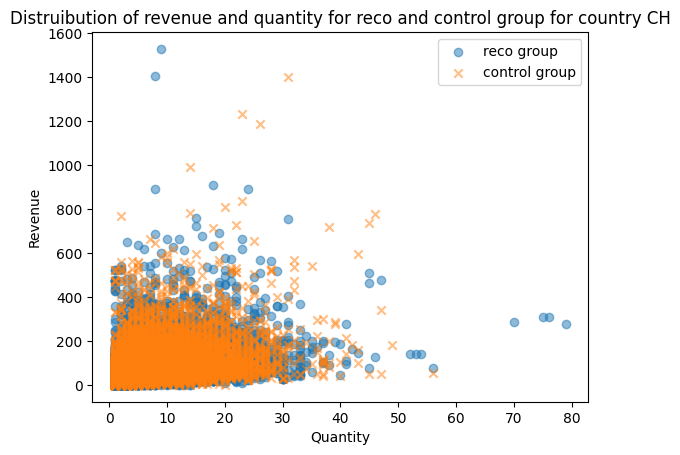

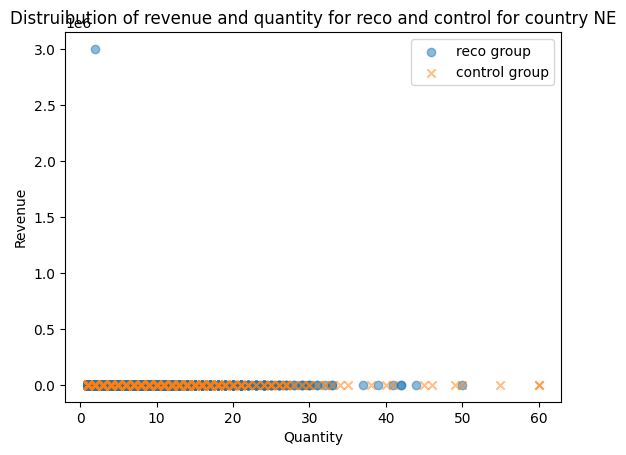

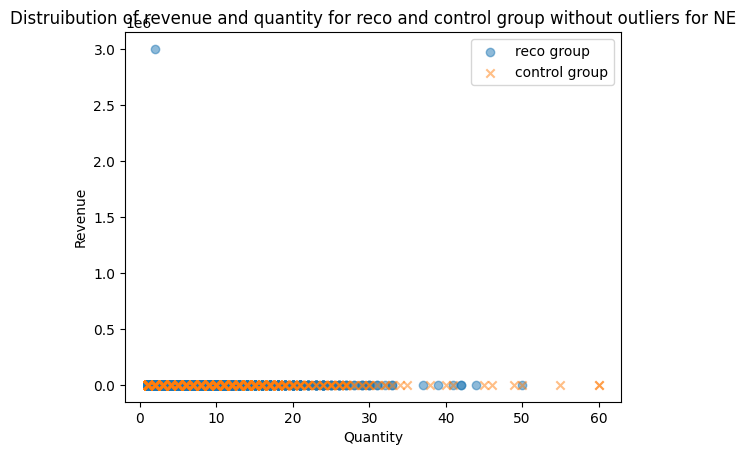

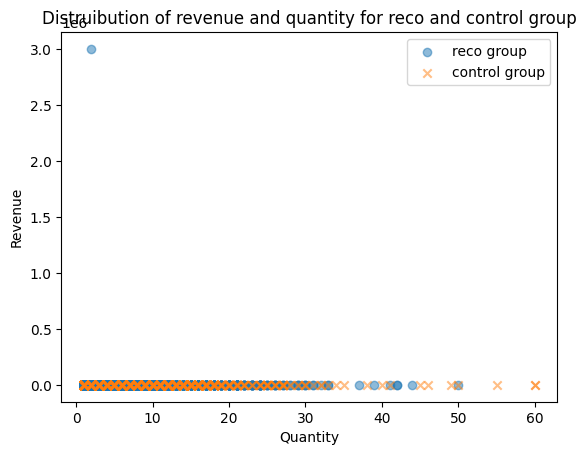

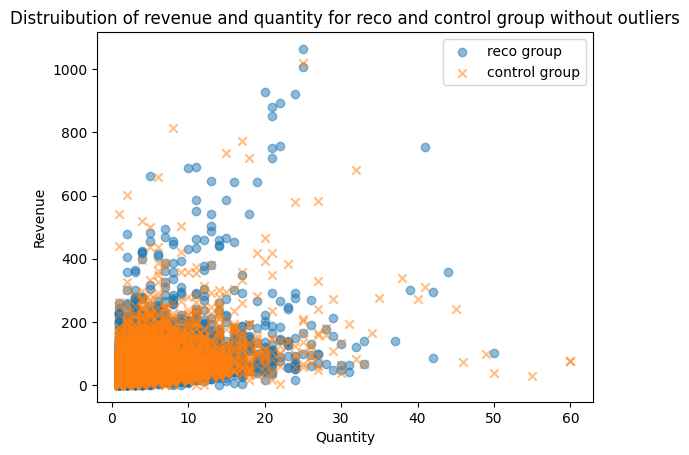

T-test for revenue without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.6109470129013062, pvalue=0.0)
ShapiroResult(statistic=0.6862977743148804, pvalue=0.0)

F-test - Homogeneity test: 
(1.2239026047727248, 1.1102230246251565e-16)

Ttest_indResult(statistic=1.0295916063952226, pvalue=0.30320729899348864)

               T           dof alternative     p-val          CI95%   cohen-d  \
T-test  1.030275  44592.047241   two-sided  0.302887  [-0.36, 1.17]  0.009714   

         BF10    power  
T-test  0.018  0.17748  
---------------------------------
T-test for quantity without outliners: 



c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.7232784032821655, pvalue=0.0)
ShapiroResult(statistic=0.7071982622146606, pvalue=0.0)

F-test - Homogeneity test: 
(0.9789779696801165, 0.9443402996023509)

Ttest_indResult(statistic=-0.7490330055836284, pvalue=0.4538412332769812)

               T           dof alternative     p-val          CI95%   cohen-d  \
T-test -0.748981  44908.569326   two-sided  0.453873  [-0.08, 0.04]  0.007067   

         BF10     power  
T-test  0.014  0.116332  


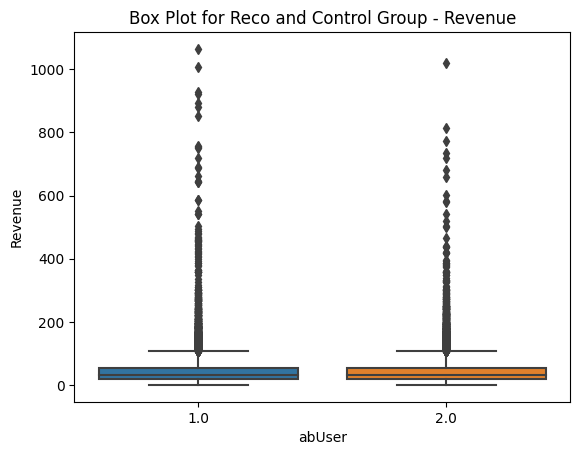

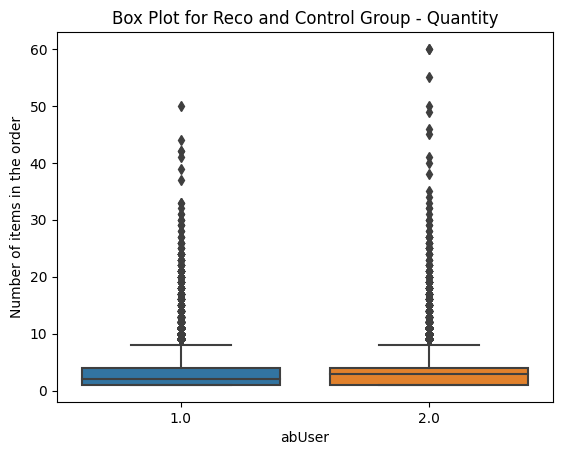

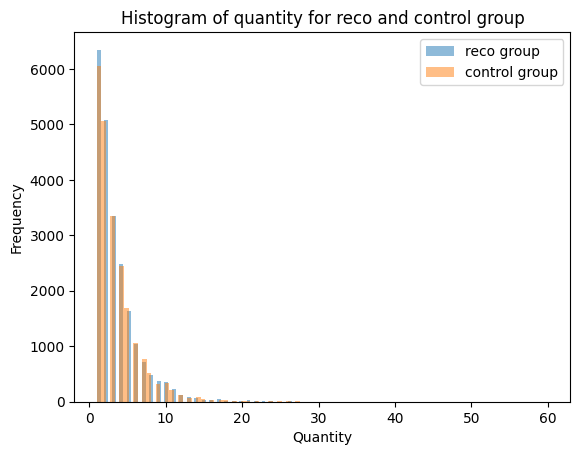

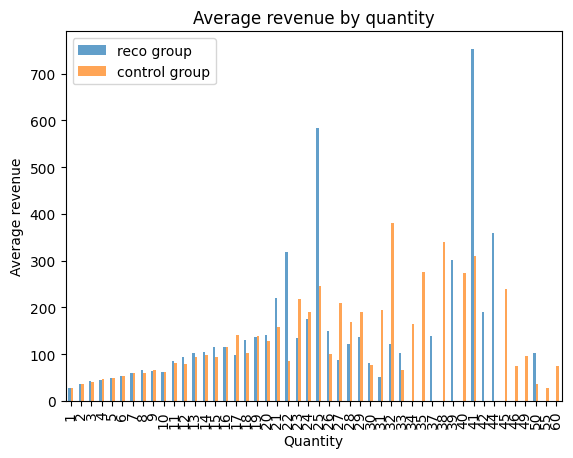

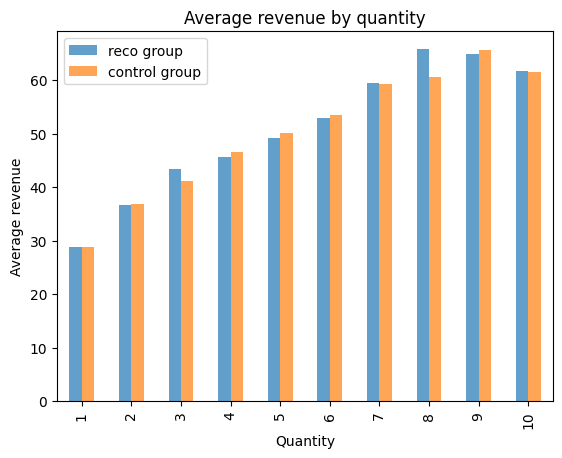

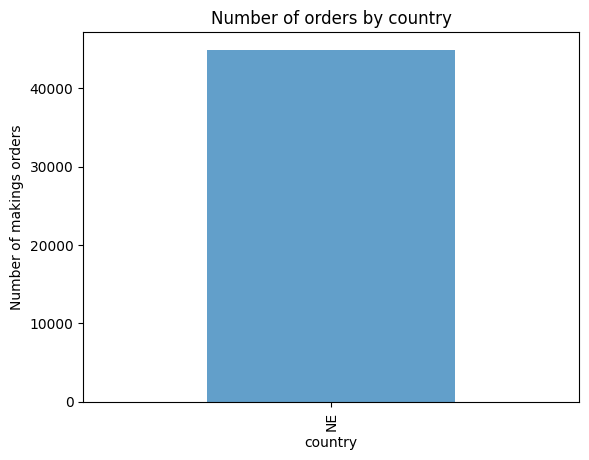

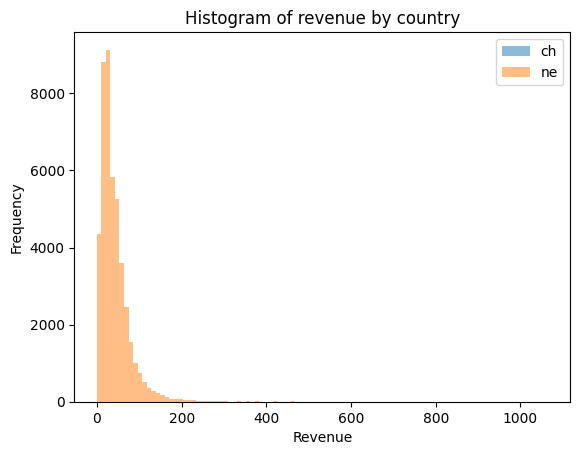

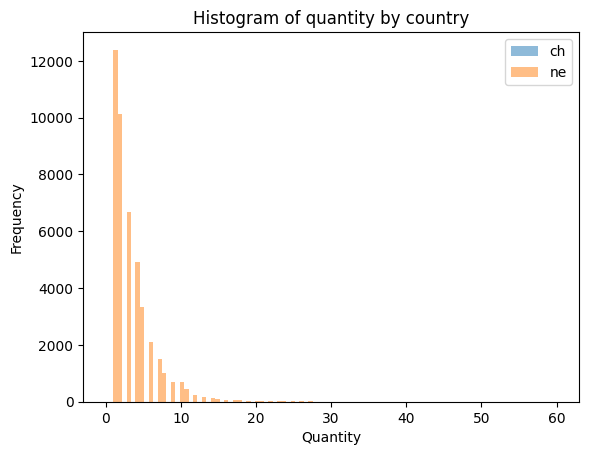

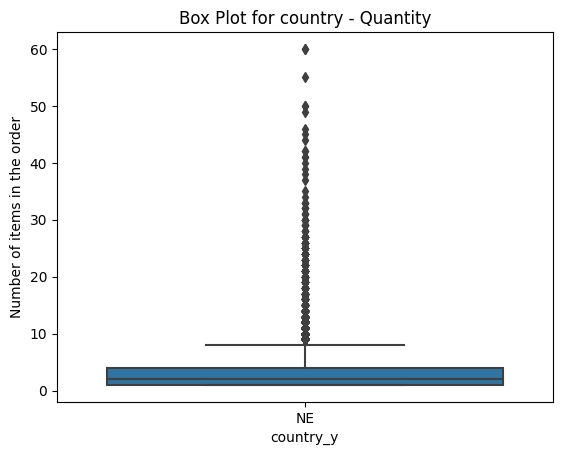

In [507]:
#  •	Does the “reco group” earn, on average, a greater revenue? Does it have larger orders? 
# Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?

# reco group:  abUser == 1
# control group: abUser == 2 

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

# this fuction verified the prerequisites for t-test (normality and homogeneity)
= stats.shapiro(data_reco_without_outliers1 )


### Check the distribution of the data for quantity and revenue
df_join = df_join_ch
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group for country CH')
plt.show()

df_join = df_join_ne
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control for country NE')
plt.show()

# Drop outliers from NE dataframe
df_join_without_outliers = df_join_ne.drop(reco_max)

# Plot of distribution without outliers
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group without outliers for NE')
plt.show()

df_join_ne = df_join_without_outliers # refined dataframe

###############
reco_mean = df_join['revenue'][df_join['abUser']==1].mean() 
control_mean = df_join['revenue'][df_join['abUser']==2].mean()

# plot relationship between quantity and revenue
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group')
plt.show()

### detected outliner, which does not change the mean quantity result

reco_max = df_join['revenue'][df_join['abUser']==1].idxmax()

df_join_without_outliers = df_join.drop(reco_max)

# Plot of distribution without outliers
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2], df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2], alpha=0.5, marker = "x")
plt.xlabel('Quantity')
plt.ylabel('Revenue')
plt.legend(['reco group', 'control group'])
plt.title('Distruibution of revenue and quantity for reco and control group without outliers')
plt.show()

# T-test for independent samples unpair
# For data without outliers

# from https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value

### For revenue
print("T-test for revenue without outliners: " + "\n")

data_reco_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1]
data_control_without_outliers1 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2]

# Shapiro-wilk test - Normality test:
test_normality_reco_revenue = stats.shapiro(data_reco_without_outliers1 )
test_normality_control_revenue = stats.shapiro(data_control_without_outliers1)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_revenue)
print(test_normality_control_revenue + "\n")

# perform F-test - Homogeneity test
reco_ftest = f_test(data_reco_without_outliers1, data_control_without_outliers1)
print("F-test - Homogeneity test: ")
print(reco_ftest + "\n")

# Two ways to calculate t-test

result_stats = stats.ttest_ind(a=data_reco_without_outliers1, b=data_control_without_outliers1 , equal_var=True)
print(result_stats + "\n")

result = pg.ttest(data_reco_without_outliers1,
                  data_control_without_outliers1,
                  correction=True)
print(result)
print("---------------------------------")

### For quantity
print("T-test for quantity without outliners: " + "\n")
data_reco_without_outliers2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==1]
data_control_without_outliers2 = df_join_without_outliers['quantity'][df_join_without_outliers['abUser']==2]

# Shapiro-wilk test - Normality test:
test_normality_reco_quantity = stats.shapiro(data_reco_without_outliers2)
test_normality_control_quantity = stats.shapiro(data_control_without_outliers2)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_quantity)
print(test_normality_control_quantity + "\n")

# perdom F test - Homogeneity test
control_ftest = f_test(data_reco_without_outliers2,data_control_without_outliers2)
print("F-test - Homogeneity test: ")
print(control_ftest + "\n")

# Two ways to calculate t-test
result_stats2 = stats.ttest_ind(a=data_reco_without_outliers2, b=data_control_without_outliers2, equal_var=True)

print(result_stats2 + "\n")

result2 = pg.ttest(data_reco_without_outliers2,
                  data_control_without_outliers2,
                  correction=True)
print(result2)

# Boxplot for revenue
sns.boxplot(data=df_join_without_outliers, x='abUser', y='revenue')
plt.ylabel("Revenue")
plt.title("Box Plot for Reco and Control Group - Revenue")
plt.show()

# Boxplot for quantity
sns.boxplot(data=df_join_without_outliers, x='abUser', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Box Plot for Reco and Control Group - Quantity")
plt.show()

# Histogram for quantity
plt.hist(x = df_join['quantity'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['quantity'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend(['reco group', 'control group'])
plt.title('Histogram of quantity for reco and control group')
plt.show()

# Visualization of average revenue by quantity
grouped_data = df_join_without_outliers.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(['reco group', 'control group'])
plt.show()


# Visualization of average revenue by quantity for most common quantity
filtered_df = df_join_without_outliers[df_join_without_outliers['quantity'].between(1, 10)]
grouped_data_filtered = filtered_df.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data_filtered.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
ax.legend(['reco group', 'control group'])
plt.show()

### Diference between country

# Number of orders by country
grouped_data_by_country = df_join_without_outliers.groupby(['country_y'])['quantity'].count()
ax = grouped_data_by_country.plot(kind='bar', alpha=0.7)
ax.set_title("Number of orders by country")
ax.set_ylabel('Number of makings orders')
ax.set_xlabel('country')
plt.show()

# Frequency of revenue by country
plt.hist(x = df_join_without_outliers['revenue'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['revenue'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of revenue by country')
plt.show()

# Frequency of quantity by country
plt.hist(x = df_join_without_outliers['quantity'][df_join['country_y']=="CH"], bins = 100,  alpha = 0.5, label = 'ch')
plt.hist(x = df_join_without_outliers['quantity'][df_join['country_y']=="NE"], bins = 100,  alpha = 0.5, label = 'ne')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of quantity by country')
plt.show()

# Boxplot for quantity
sns.boxplot(data=df_join_without_outliers, x='country_y', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Box Plot for country - Quantity")
plt.show()


In [508]:
#  •	Does the “reco group” earn, on average, a greater revenue? Does it have larger orders? 
# Propose appropriate metrics and visualize them. Is there any other metric you may wish to evaluate?

# reco group:  abUser == 1
# control group: abUser == 2 

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-stats.f.cdf(f, nun, dun)
    return f, p_value



In [538]:
df = df_join_ch
# reco_max = df['revenue'][df['abUser']==1].idxmax()
# df = df.drop(reco_max)
df_reco = df['quantity'][df['abUser']==1]
df_control= df['quantity'][df['abUser']==2]
df_1 = df_reco
df_2 = df_control

def t_test(df_1, df_2):
    # This fuction verified the prerequisites for t-test (normality and homogeneity)
    # and perform the t-test.

    # Shapiro-Wil test for normality in both groups
    shapiro_df_1 = stats.shapiro(df_1)
    shapiro_df_2 = stats.shapiro(df_2)
    if shapiro_df_1.pvalue < 0.05 and shapiro_df_2.pvalue < 0.05:
        print('\tThe data is normally distributed.')

        # F-test for homogeneity
        f, f_pvalue = f_test(df_1, df_2)

        if f_pvalue < 0.05:
            print("\tTwo groups variances are equal.")

            # t-test 
            ttest_result = stats.ttest_ind(a=df_1, b=df_2 , equal_var=True)
            print('\tT-test: ', ttest_result.pvalue)
            
            if ttest_result.pvalue < 0.05:
                print('\tThe difference between the two groups is statistically significant.')
            else:
                print('\tThe difference between the two groups is not statistically significant.')


        else:
            print("\tTwo groups variances are not equal. Homogeneity test failed.")

    else:
        print('\tThe data is not normally distributed.')

t_test(df_reco, df_control)


	The data is normally distributed.
	Two groups variances are equal.
	T-test:  0.29631850800304177
	The difference between the two groups is not statistically significant.


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [545]:
df = df_join_ch
# reco_max = df['revenue'][df['abUser']==1].idxmax()
# df = df.drop(reco_max)
df_reco = df['revenue'][df['abUser']==1]
df_control= df['revenue'][df['abUser']==2]
df_1 = df_reco
df_2 = df_control

ttest_result = stats.ttest_ind(a=df_1, b=df_2 , equal_var=True)
print('\tT-test: ', ttest_result.pvalue)
    
if ttest_result.pvalue < 0.05:
    print('\tThe difference between the two groups is statistically significant.')
else:
    print('\tThe difference between the two groups is not statistically significant.')



	T-test:  0.7250289384048942
	The difference between the two groups is not statistically significant.


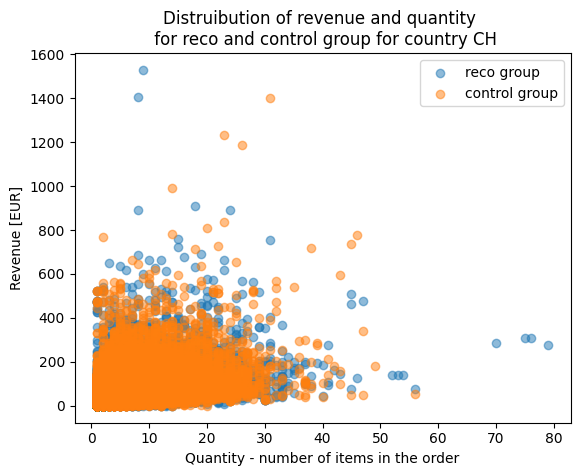

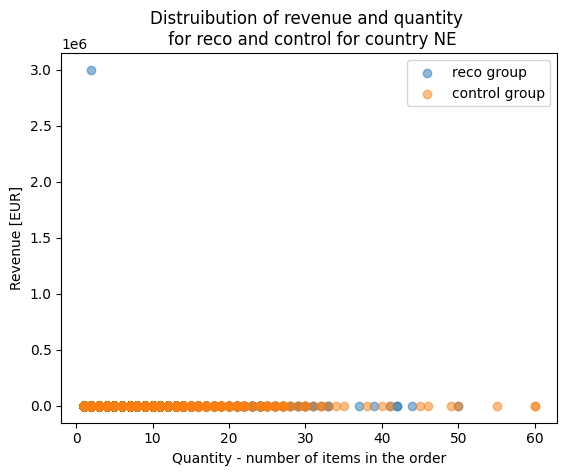

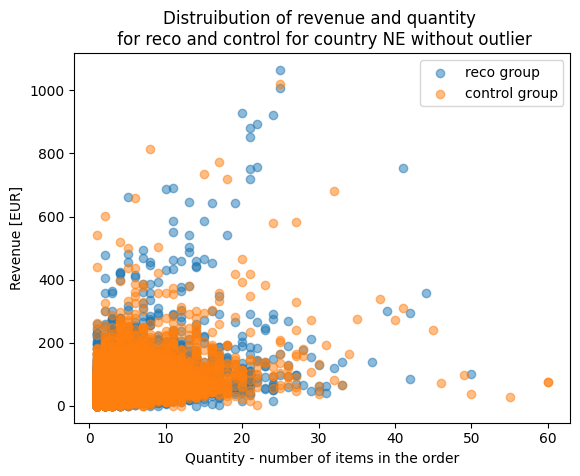

In [554]:
### Check the distribution of the data for quantity and revenue

# CH
df_join = df_join_ch
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker ='o')
plt.xlabel('Quantity - number of items in the order')
plt.ylabel('Revenue [EUR]')
plt.legend(['Reco Group', 'Control Group'])
plt.title('Distruibution of revenue and quantity \n for reco and control group for country CH')
plt.show()

# NE
df_join = df_join_ne
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker ='o')
plt.xlabel('Quantity - number of items in the order')
plt.ylabel('Revenue [EUR]')
plt.legend(['Reco Group', 'Control Group'])
plt.title('Distruibution of revenue and quantity \n for reco and control for country NE')
plt.show()

### Drop outlier from NE dataframe
reco_max = df_join_ne['revenue'][df_join_ne['abUser']==1].idxmax()
df_join_ne_with_outlier = df_join_ne.copy()
df_join_ne = df_join_ne.drop(reco_max) # redefine dataframe without outlier

# Plot of distribution without outlier
df_join = df_join_ne
plt.scatter(df_join['quantity'][df_join['abUser']==1], df_join['revenue'][df_join['abUser']==1], alpha=0.5, marker='o')
plt.scatter(df_join['quantity'][df_join['abUser']==2], df_join['revenue'][df_join['abUser']==2], alpha=0.5, marker ='o')
plt.xlabel('Quantity - number of items in the order')
plt.ylabel('Revenue [EUR]')
plt.legend(['Reco Group', 'Control Group'])
plt.title('Distruibution of revenue and quantity \n for reco and control for country NE without outlier')
plt.show()


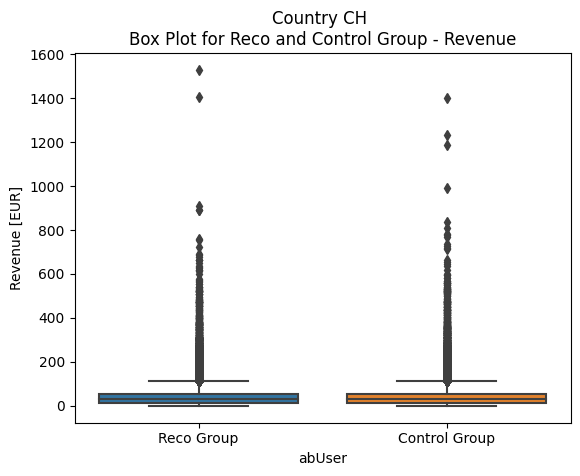

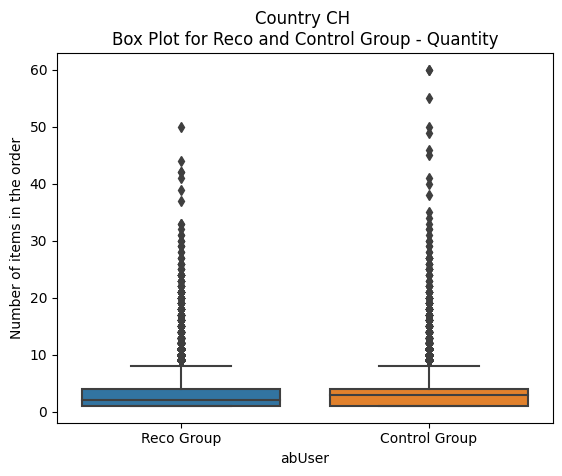

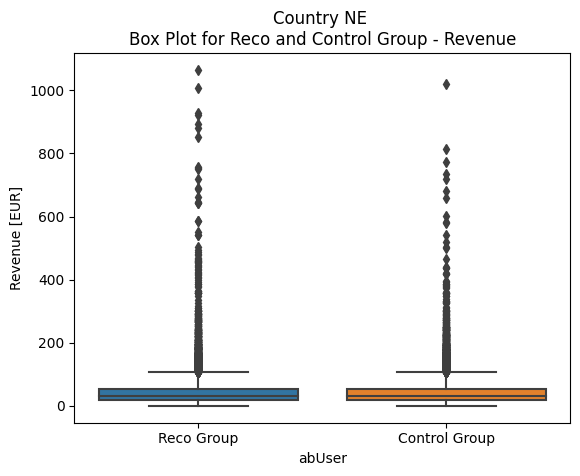

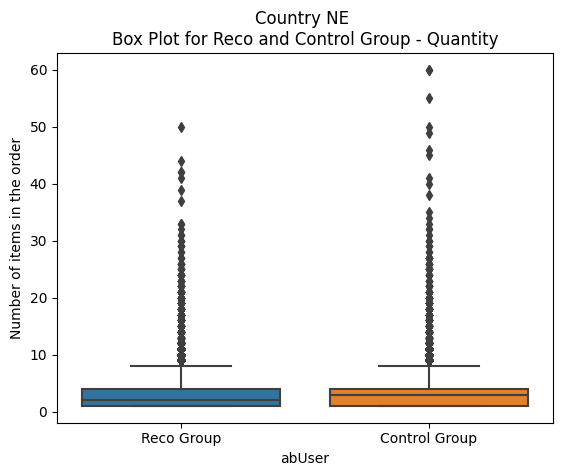

In [558]:
### CH 
# Boxplot for revenue
sns.boxplot(data=df_join_ch, x='abUser', y='revenue')
plt.ylabel("Revenue [EUR]")
plt.title("Country CH \nBox Plot for Reco and Control Group - Revenue")
plt.xticks([0, 1], ['Reco Group', 'Control Group'])
plt.show()

# Boxplot for quantity
sns.boxplot(data=df_join_ne, x='abUser', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Country CH \nBox Plot for Reco and Control Group - Quantity")
plt.xticks([0, 1], ['Reco Group', 'Control Group'])
plt.show()


### NE
# Boxplot for revenue
sns.boxplot(data=df_join_ne, x='abUser', y='revenue')
plt.ylabel("Revenue [EUR]")
plt.title("Country NE \nBox Plot for Reco and Control Group - Revenue")
plt.xticks([0, 1], ['Reco Group', 'Control Group'])
plt.show()

# Boxplot for quantity
sns.boxplot(data=df_join_ne, x='abUser', y='quantity')
plt.ylabel("Number of items in the order")
plt.title("Country NE \nBox Plot for Reco and Control Group - Quantity")
plt.xticks([0, 1], ['Reco Group', 'Control Group'])
plt.show()


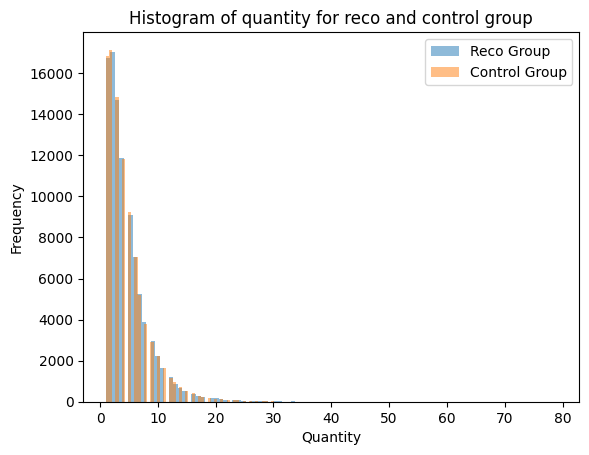

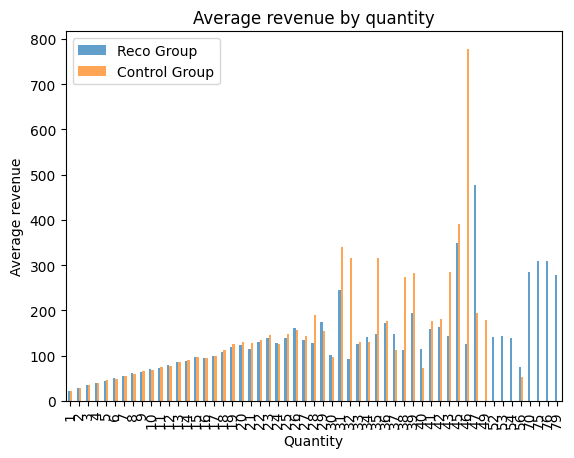

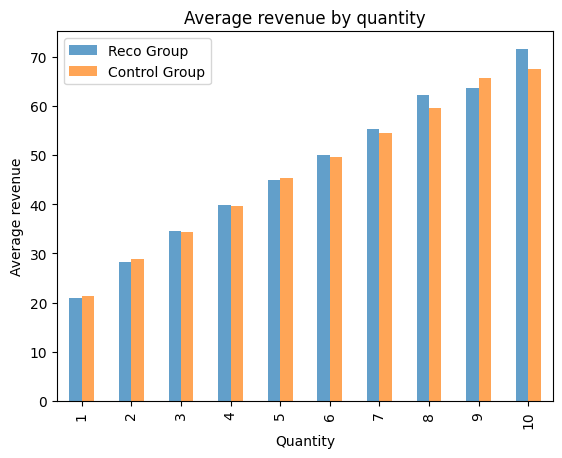

In [562]:

# Histogram for quantity
plt.hist(x = df_join['quantity'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['quantity'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.legend(['Reco Group', 'Control Group'])
plt.title('Histogram of quantity for reco and control group')
plt.show()

# Visualization of average revenue by quantity
grouped_data = df_join_without_outliers.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
plt.legend(['Reco Group', 'Control Group'])
plt.show()


# Visualization of average revenue by quantity for most common quantity
filtered_df = df_join_without_outliers[df_join_without_outliers['quantity'].between(1, 10)]
grouped_data_filtered = filtered_df.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data_filtered.plot(kind='bar', alpha=0.7)
ax.set_title('Average revenue by quantity')
ax.set_ylabel('Average revenue')
ax.set_xlabel('Quantity')
plt.legend(['Reco Group', 'Control Group'])
plt.show()


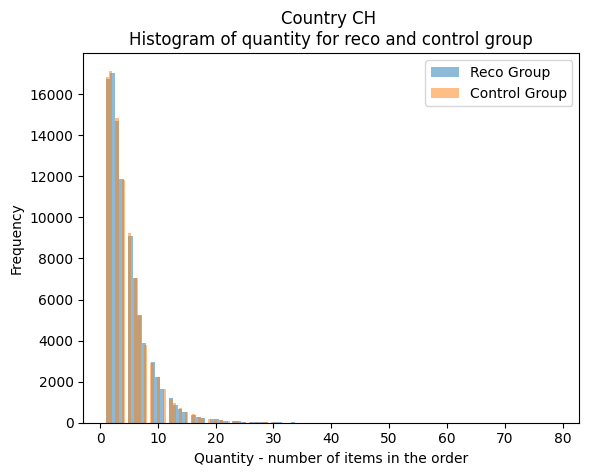

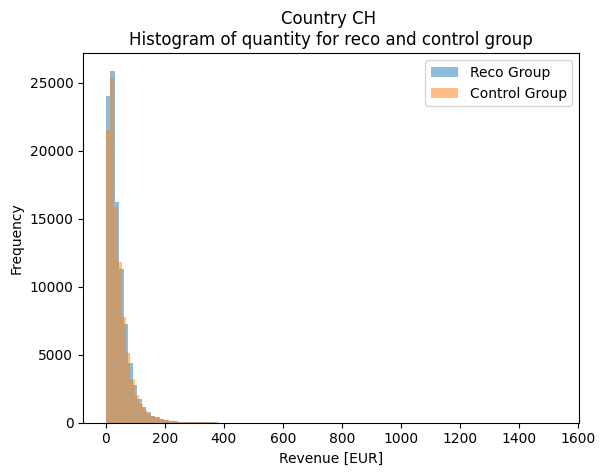

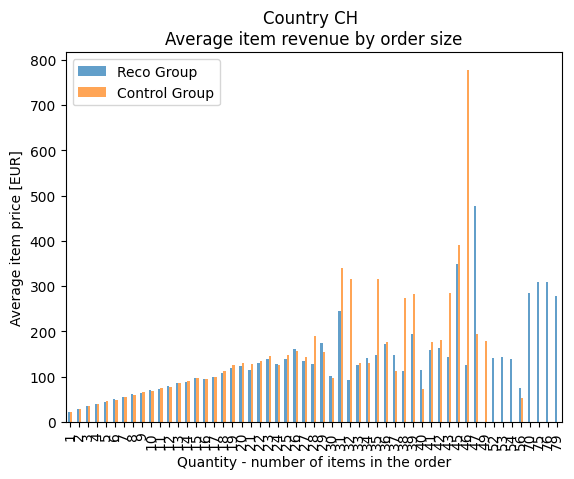

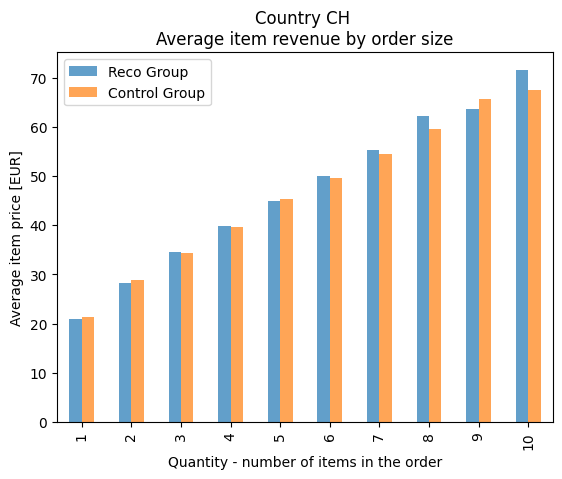

In [567]:
### CH
df_join = df_join_ch

# Histogram for quantity
plt.hist(x = df_join['quantity'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['quantity'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')
plt.xlabel('Quantity - number of items in the order')
plt.ylabel('Frequency')
plt.legend(['Reco Group', 'Control Group'])
plt.title('Country CH \nHistogram of quantity for reco and control group')
plt.show()

# Histogram for revenue
plt.hist(x = df_join['revenue'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['revenue'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')
plt.xlabel('Revenue [EUR]')
plt.ylabel('Frequency')
plt.legend(['Reco Group', 'Control Group'])
plt.title('Country CH \nHistogram of quantity for reco and control group')
plt.show()

# Visualization of average revenue by quantity
grouped_data = df_join.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Country CH \nAverage item revenue by order size')
ax.set_ylabel('Average item price [EUR]')
ax.set_xlabel('Quantity - number of items in the order')
plt.legend(['Reco Group', 'Control Group'])
plt.show()


# Visualization of average revenue by quantity for most common quantity
filtered_df = df_join[df_join['quantity'].between(1, 10)]
grouped_data_filtered = filtered_df.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data_filtered.plot(kind='bar', alpha=0.7)
ax.set_title('Country CH \nAverage item revenue by order size')
ax.set_ylabel('Average item price [EUR]')
ax.set_xlabel('Quantity - number of items in the order')
plt.legend(['Reco Group', 'Control Group'])
plt.show()

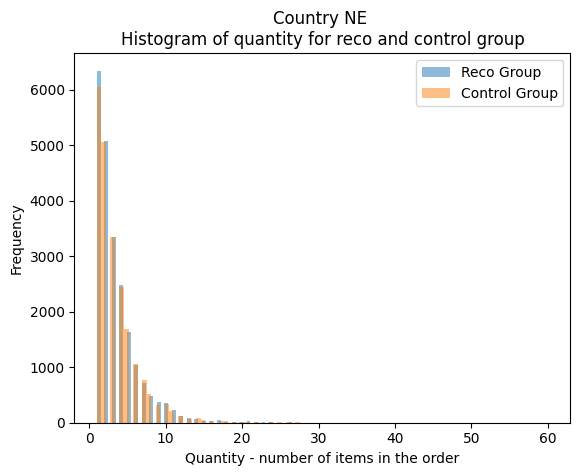

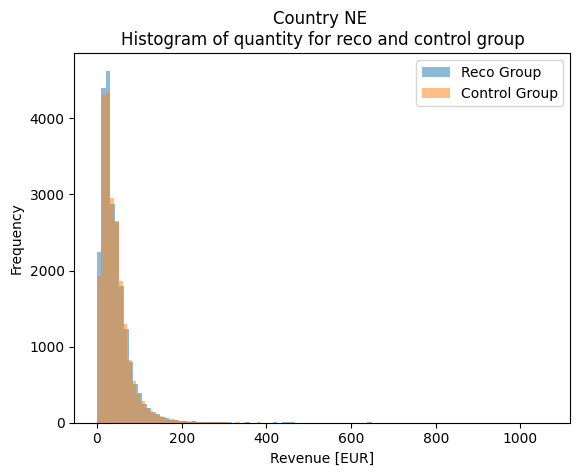

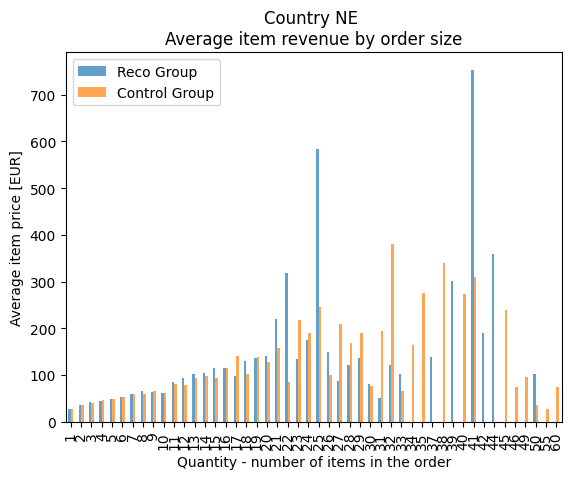

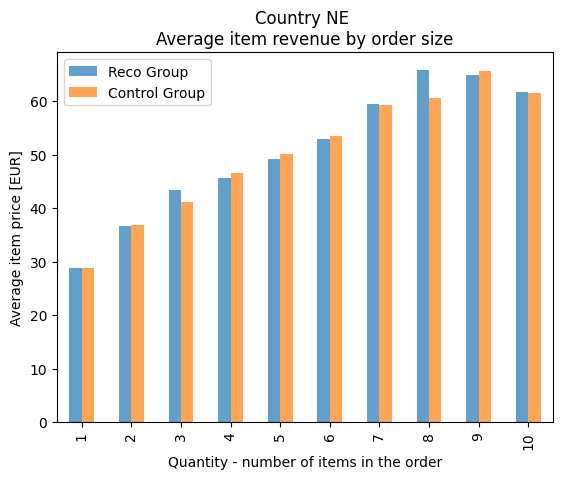

In [568]:
### NE
df_join = df_join_ne

# Histogram for quantity
plt.hist(x = df_join['quantity'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['quantity'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')
plt.xlabel('Quantity - number of items in the order')
plt.ylabel('Frequency')
plt.legend(['Reco Group', 'Control Group'])
plt.title('Country NE \nHistogram of quantity for reco and control group')
plt.show()

# Histogram for revenue
plt.hist(x = df_join['revenue'][df_join['abUser']==1], bins = 100,  alpha = 0.5, label = 'reco group')
plt.hist(x = df_join['revenue'][df_join['abUser']==2], bins = 100,  alpha = 0.5, label = 'control group')
plt.xlabel('Revenue [EUR]')
plt.ylabel('Frequency')
plt.legend(['Reco Group', 'Control Group'])
plt.title('Country NE \nHistogram of quantity for reco and control group')
plt.show()

# Visualization of average revenue by quantity
grouped_data = df_join.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data.plot(kind='bar', alpha=0.7)
ax.set_title('Country NE \nAverage item revenue by order size')
ax.set_ylabel('Average item price [EUR]')
ax.set_xlabel('Quantity - number of items in the order')
plt.legend(['Reco Group', 'Control Group'])
plt.show()


# Visualization of average revenue by quantity for most common quantity
filtered_df = df_join[df_join['quantity'].between(1, 10)]
grouped_data_filtered = filtered_df.groupby(['quantity', 'abUser'])['revenue'].mean().unstack()

ax = grouped_data_filtered.plot(kind='bar', alpha=0.7)
ax.set_title('Country NE \nAverage item revenue by order size')
ax.set_ylabel('Average item price [EUR]')
ax.set_xlabel('Quantity - number of items in the order')
plt.legend(['Reco Group', 'Control Group'])
plt.show()

In [526]:
### For quantity
print("T-test for quantity without outliners: ")
print("")
df_join_without_outliers = df_join_ch
data_reco_without_outliers2 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==1]
data_control_without_outliers2 = df_join_without_outliers['revenue'][df_join_without_outliers['abUser']==2]

# Shapiro-wilk test - Normality test:
test_normality_reco_quantity = stats.shapiro(data_reco_without_outliers2)
test_normality_control_quantity = stats.shapiro(data_control_without_outliers2)
print("Shapiro-wilk test - Normality test: ")
print(test_normality_reco_quantity)
print(test_normality_control_quantity)
print("")

# perdom F test - Homogeneity test
control_ftest = f_test(data_reco_without_outliers2,data_control_without_outliers2)
print("F-test - Homogeneity test: ")
print(control_ftest)
print("")

# Two ways to calculate t-test
result_stats2 = stats.ttest_ind(a=data_reco_without_outliers2, b=data_control_without_outliers2, equal_var=True)

print(result_stats2)
print("")

result2 = pg.ttest(data_reco_without_outliers2,
                  data_control_without_outliers2,
                  correction=True)
print(result2)

T-test for quantity without outliners: 

Shapiro-wilk test - Normality test: 
ShapiroResult(statistic=0.7020800113677979, pvalue=0.0)
ShapiroResult(statistic=0.690265417098999, pvalue=0.0)

F-test - Homogeneity test: 
(0.9758581928349042, 0.9999331004060344)

Ttest_indResult(statistic=0.35174626689573596, pvalue=0.7250289384048942)

               T           dof alternative     p-val          CI95%   cohen-d  \
T-test  0.351751  195395.86741   two-sided  0.725025  [-0.31, 0.45]  0.001591   

         BF10    power  
T-test  0.005  0.06429  


c:\Users\klara\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")
